# Methane Hotspot

In [1363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from thesis_setup import thesis_setup
from thesis_setup import getL8Dates
from thesis import compiled_regression
from thesis import check_L8
pd.options.display.max_columns = None

# Path names
rootPath = '/Users/darianng/Documents/Msc_Geography/Msc Thesis'

def showAllKeys(data):
    # Showing data keys.
    print(f'--ALL DATA KEYS--\n')
    for key in data.keys():
        if isinstance(data[key],dict):
            print(f'Key: {key}\n       {list(data[key].keys())}')
            for subkey in data[key].keys():
                if isinstance(data[key][subkey],dict):
                    print(f'        keys:\n          {subkey}: {list(data[key][subkey].keys())}')
        else:
            print(f'Key: {key}')
            
# def showAllKeys(data):
#     for key in data.keys():
#         if isinstance(data[key],dict):
#             print(f'Key: {key}\n       {list(data[key].keys())}')
#             for subkey in data[key].keys():
#                 if isinstance(data[key], dict):
#                     showAllKeys(data[key])

In [1080]:
from thesis_setup import getL8Dates
dates = getL8Dates1('US-Myb',getlist=True)
np.unique(dates)

Landsat 8 dates for US-Myb (256 total images):

2013 (24): 
[20130409 20130416 20130603 20130619 20130705 20130705 20130721 20130721
 20130822 20130822 20130907 20130907 20130923 20130923 20131009 20131009
 20131025 20131025 20131110 20131110 20131212 20131212 20131228 20131228]

2014 (32): 
[20140113 20140113 20140318 20140318 20140419 20140419 20140505 20140505
 20140521 20140521 20140606 20140606 20140622 20140622 20140708 20140708
 20140724 20140724 20140809 20140809 20140825 20140825 20140910 20140910
 20140926 20140926 20141012 20141012 20141028 20141028 20141231 20141231]

2015 (28): 
[20150305 20150305 20150321 20150321 20150406 20150406 20150422 20150422
 20150508 20150508 20150524 20150524 20150625 20150625 20150711 20150711
 20150727 20150727 20150812 20150812 20150929 20150929 20151031 20151031
 20151116 20151116 20151218 20151218]

2016 (30): 
[20160204 20160204 20160323 20160323 20160510 20160510 20160526 20160526
 20160611 20160611 20160627 20160627 20160713 20160713 201

array([20130409, 20130416, 20130603, 20130619, 20130705, 20130721,
       20130822, 20130907, 20130923, 20131009, 20131025, 20131110,
       20131212, 20131228, 20140113, 20140318, 20140419, 20140505,
       20140521, 20140606, 20140622, 20140708, 20140724, 20140809,
       20140825, 20140910, 20140926, 20141012, 20141028, 20141231,
       20150305, 20150321, 20150406, 20150422, 20150508, 20150524,
       20150625, 20150711, 20150727, 20150812, 20150929, 20151031,
       20151116, 20151218, 20160204, 20160323, 20160510, 20160526,
       20160611, 20160627, 20160713, 20160729, 20160814, 20160830,
       20160915, 20161001, 20161017, 20161102, 20161118, 20170222,
       20170427, 20170513, 20170614, 20170630, 20170716, 20170801,
       20170817, 20170902, 20171004, 20171105, 20171207, 20180209,
       20180225, 20180329, 20180414, 20180601, 20180617, 20180719,
       20180804, 20180820, 20180905, 20180921, 20181007, 20181108,
       20181124, 20181226, 20190228, 20190316, 20190417, 20190

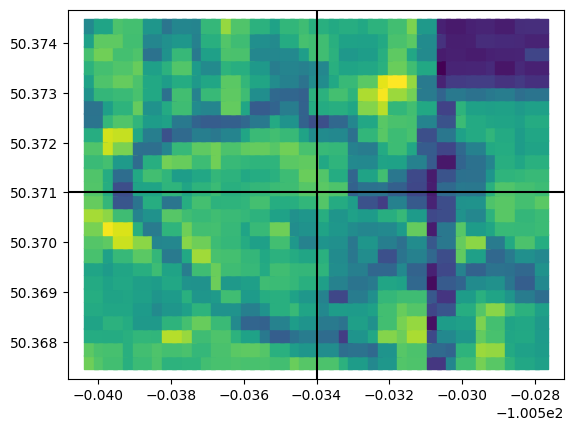

In [34]:
from thesis import check_L8
check_L8(site='Hogg',L8_date=20230501,product='NDVI',pixelSize=100)

# Perform Cluster

In [161]:
from thesis import preprocess_maps
from thesis import ffp_clustering

data = preprocess_maps(siteName = 'Young',fluxmap_filename = '202107015-202108015',L8_date = 20221122)
data, fig = ffp_clustering(data,GHG_var='ch4',n_clusters=5)

# Save Run

Figures and data saved to: 
/Users/darianng/Documents/Msc_Geography/Methane_Hotspot/FARF_Code/python_code/Saved_Data_Cluster/US-Myb_FFP=202010017-202010031_L8=20201028


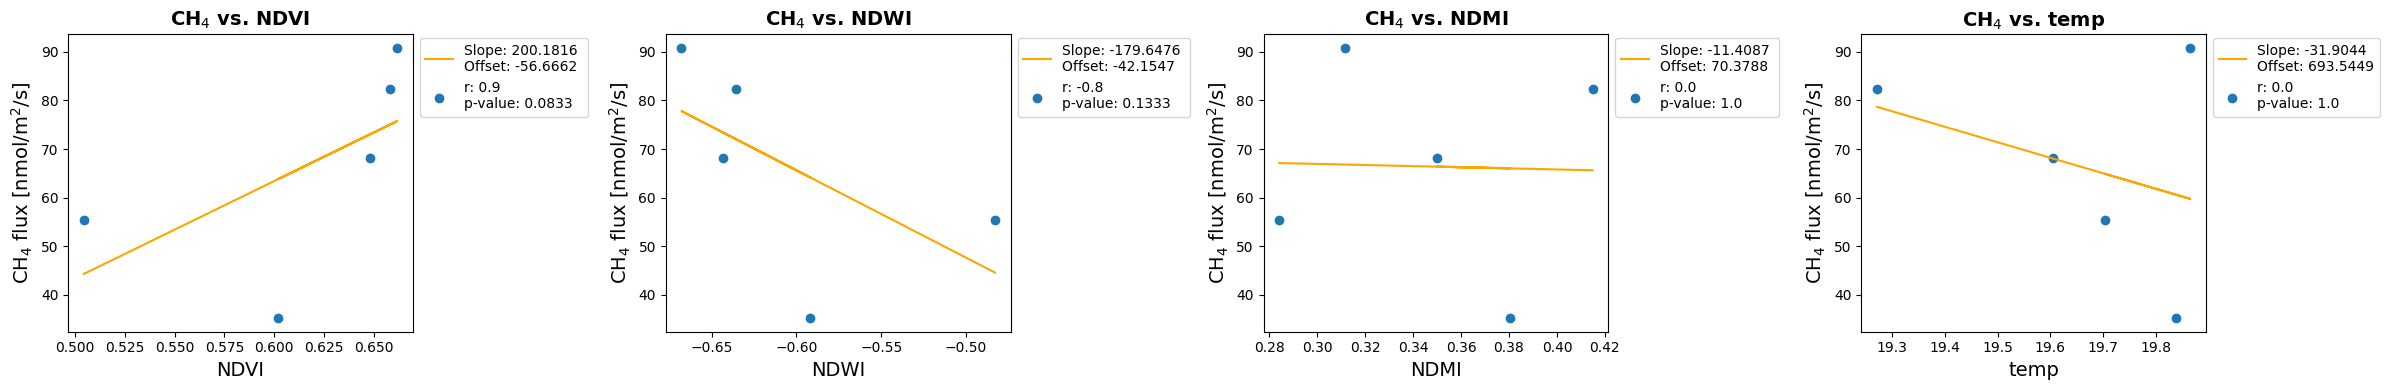

<Figure size 800x1500 with 0 Axes>

In [72]:
from thesis_setup import thesis_setup
from thesis import save_cluster
save_folder = thesis_setup('US-Myb')[8]
fig1,data = save_cluster(data,save_folder)
plt.clf()

In [50]:
import pickle
regressionPath = '/Users/darianng/Documents/Msc_Geography/MSc Thesis/Data/Compilation/US-Myb_June'
regressionName = 'US-Myb_FFP=202106010-202107010_L8=20210625'
with open(regressionPath+'/'+regressionName+'.p', 'wb') as fp:
        pickle.dump(data, fp, protocol=pickle.HIGHEST_PROTOCOL)

fig1.savefig(regressionPath+'/'+regressionName+'.png')


Collapsing data to single analysis...half way there...done!


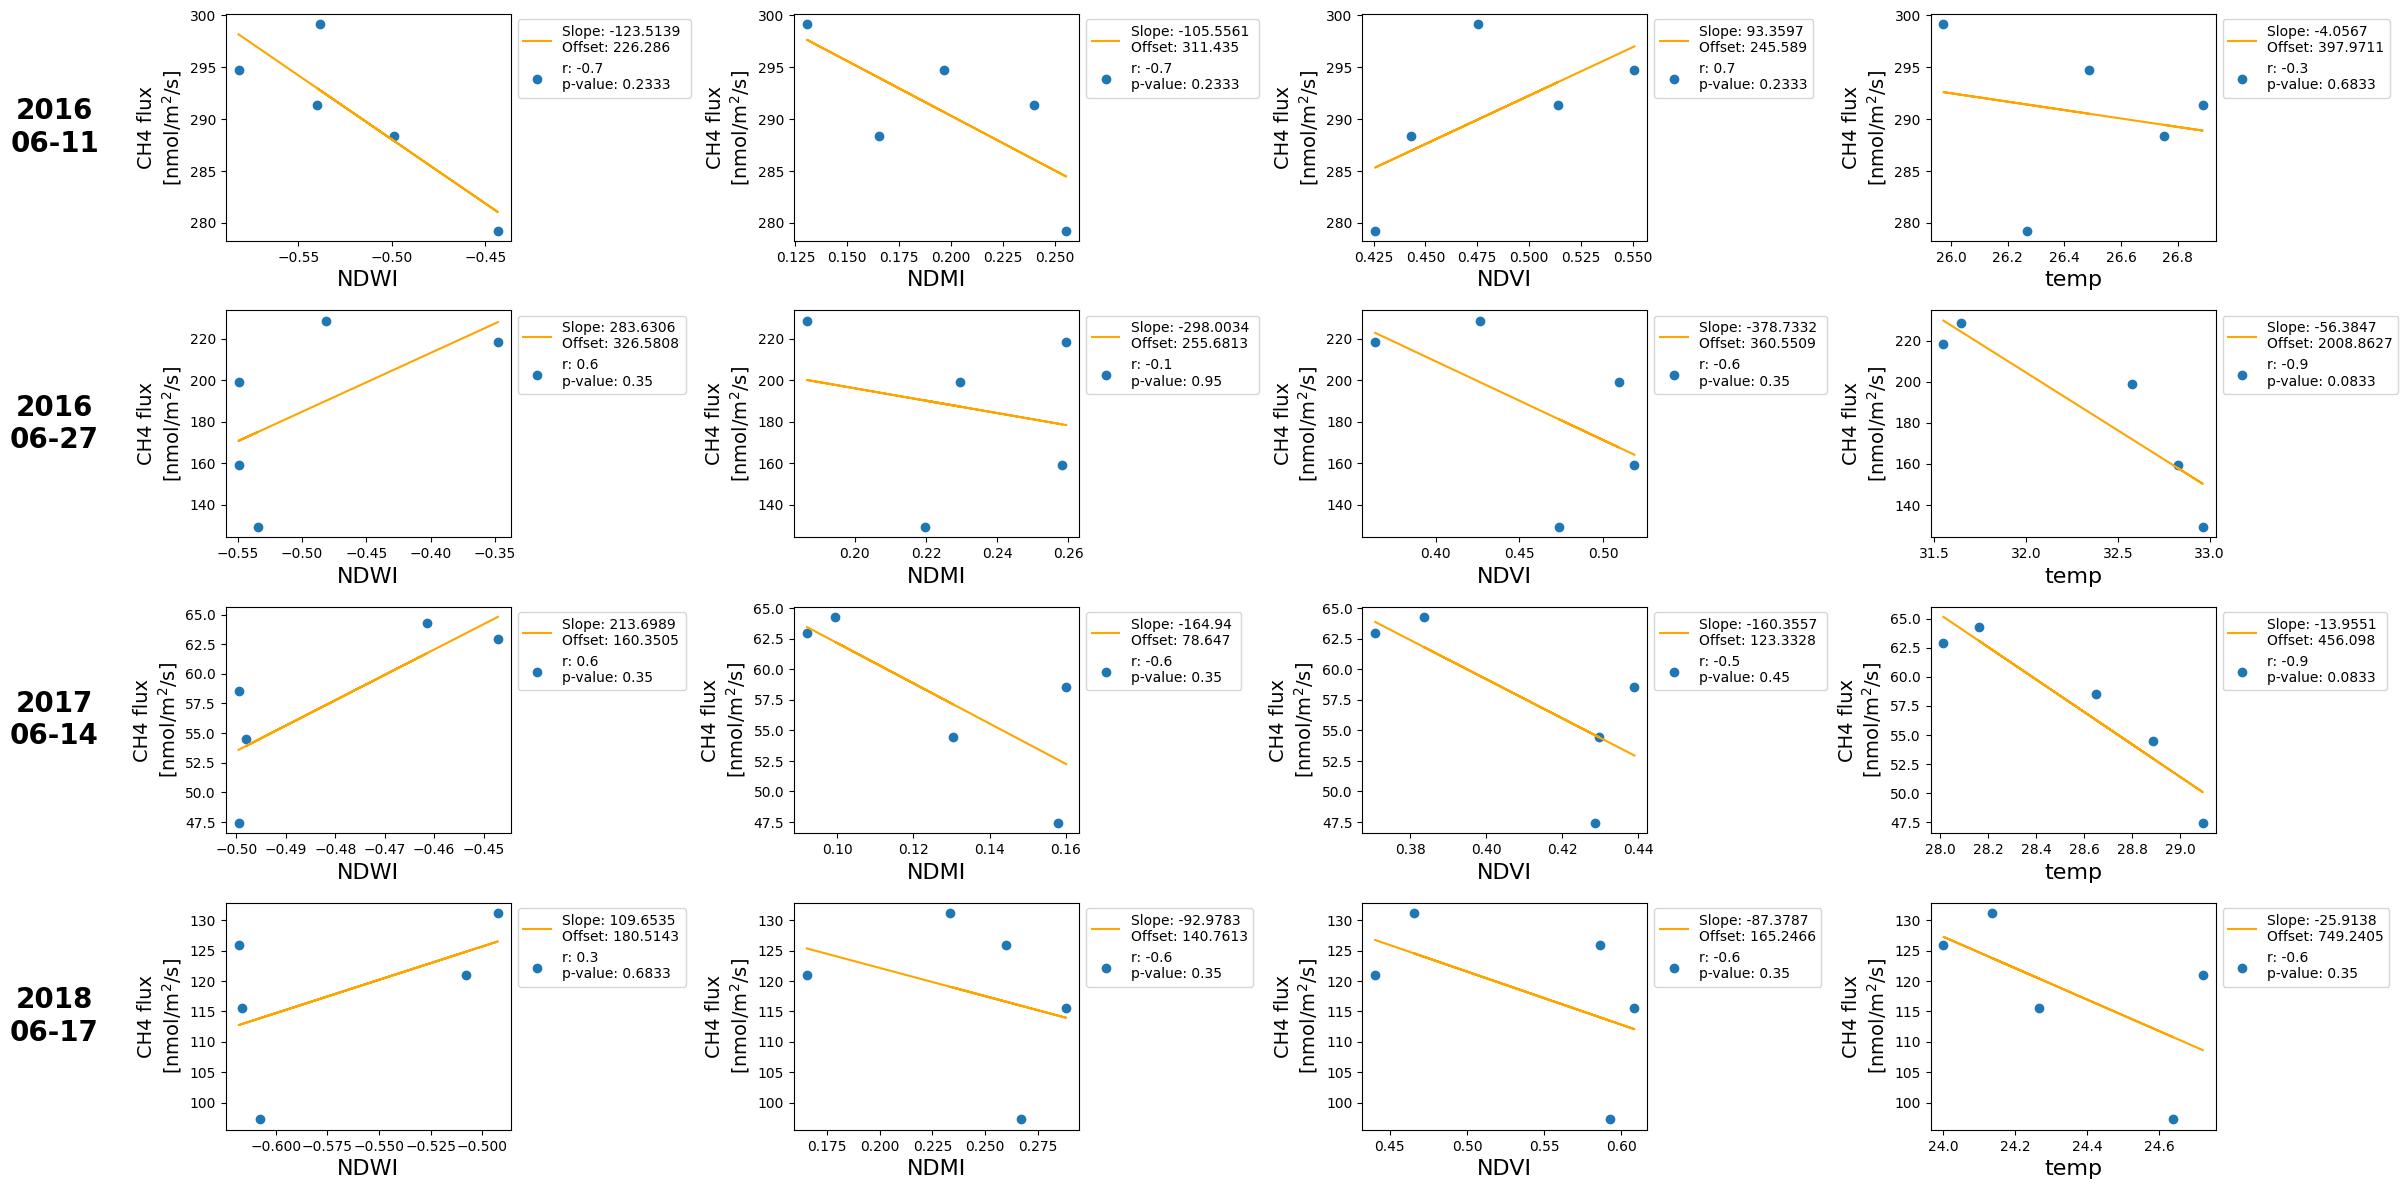

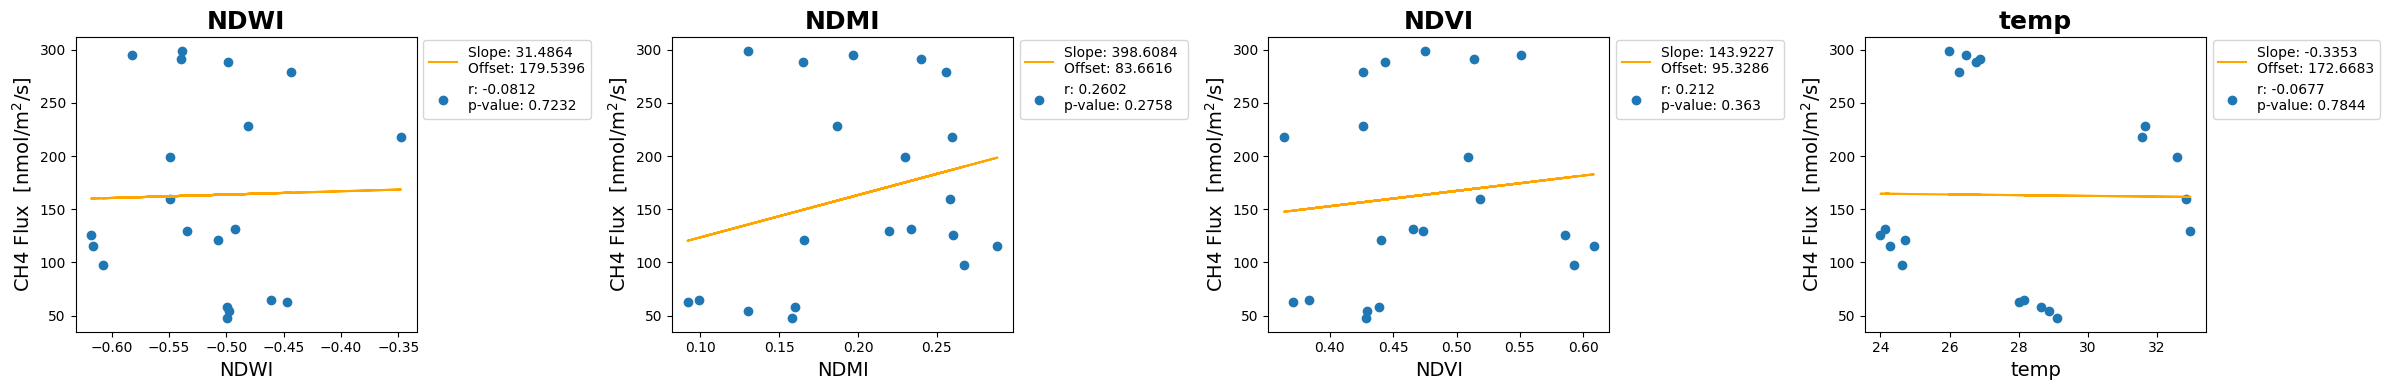

In [153]:
from thesis import compiled_regression
compiled_data = ['US-Myb_FFP=201306005-201307005_L8=20130619',
                 'US-Myb_FFP=201405020-201406020_L8=20140606',
                 'US-Myb_FFP=201505025-201506025_L8=20160611',
                 'US-Myb_FFP=201606012-201607012_L8=20160627',
                 'US-Myb_FFP=201706001-201707001_L8=20170614',
                 'US-Myb_FFP=201806001-201807001_L8=20180617']
dataPath = '/Users/darianng/Documents/MSc_Geography/MSc Thesis/Data/Compilation/US-Myb_June/'
# dataPath = '/Users/darianng/Documents/Msc_Geography/Methane_Hotspot/FARF_Code/python_code/Saved_Data_Cluster'
fig1,fig2,compiled_data = compiled_regression(compiled_data,dataPath,correlation='Spearman')

In [6]:
showAllKeys(data)
'US-Myb_FFP=201306005-201307005_L8=20130619',
                 'US-Myb_FFP=201405020-201406020_L8=20140606',

--ALL DATA KEYS--

Key: siteName
Key: landsat
       ['MNDWI2', 'NDMI', 'NDVI', 'NDWI', 'temp', 'lonData', 'latData']
Key: matched_ffp
       ['xr', 'yr', 'co2', 'ch4', 'h']
Key: ffp
       ['xr', 'yr', 'co2', 'ch4', 'h']
Key: lonData
Key: latData
Key: spatialData
       ['MNDWI2', 'NDMI', 'NDVI', 'NDWI', 'temp']
Key: run
Key: clustered_landsat
       ['NDVI', 'NDWI', 'NDMI', 'MNDWI2', 'temp']
Key: clustered_ffp
Key: GHG_var


In [20]:
thesis_setup('US-Myb')

([-121.7651, 38.0498],
 'US-Myb_spatial_indices_2013_Feb_2021_Dec.csv',
 '/Users/darianng/Documents/Msc_Geography/Methane_Hotspot/FARF_Code/python_code',
 '/Users/darianng/Documents/MSc_Geography/MSc Thesis',
 '/Users/darianng/Documents/MSc_Geography/MSc Thesis/Figures',
 '/Users/darianng/Documents/MSc_Geography/MSc Thesis/Data',
 '/Volumes/GoogleDrive/My Drive/Micromet_GEE',
 '/Users/darianng/Documents/MSc_Geography/Methane_Hotspot/FARF_Code/python_code/data',
 '/Users/darianng/Documents/Msc_Geography/Methane_Hotspot/FARF_Code/python_code/Saved_Data_Cluster')

Collapsing data to single analysis...half way there...done!


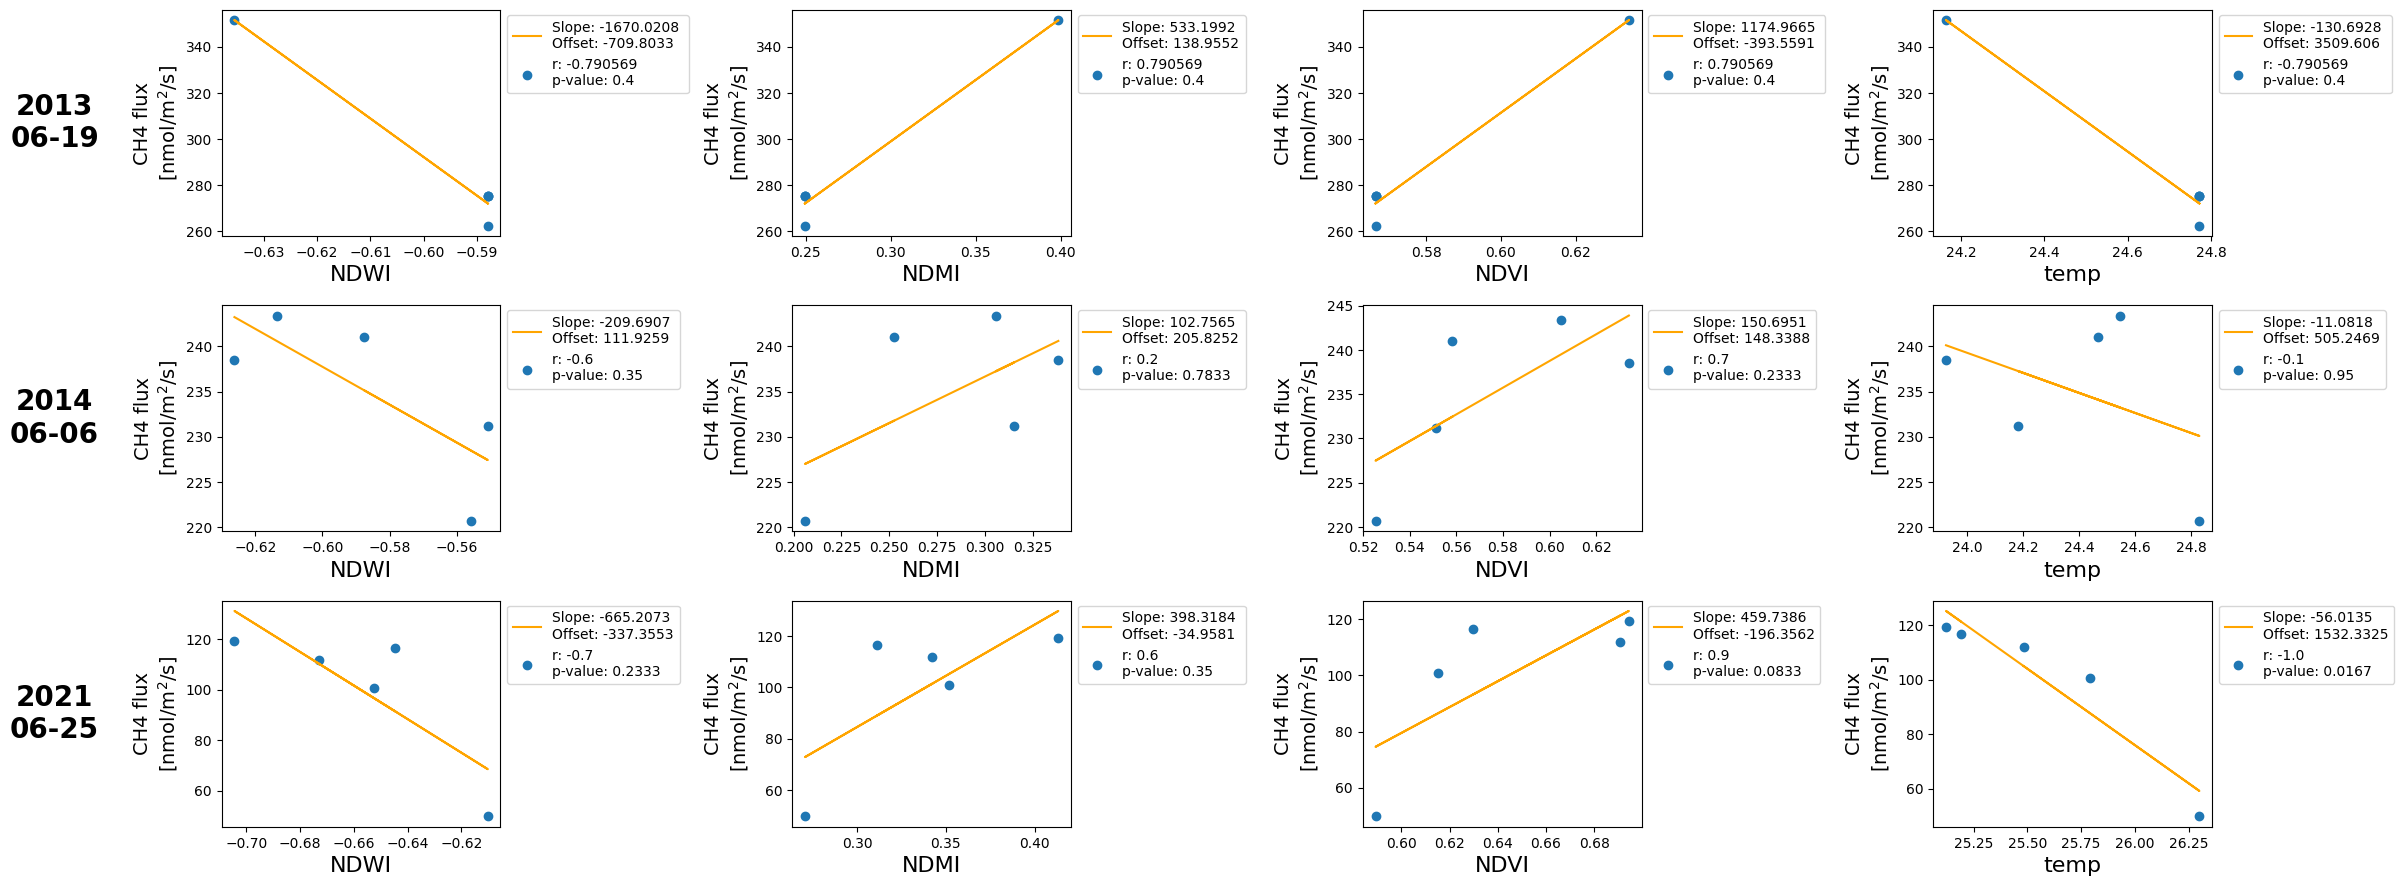

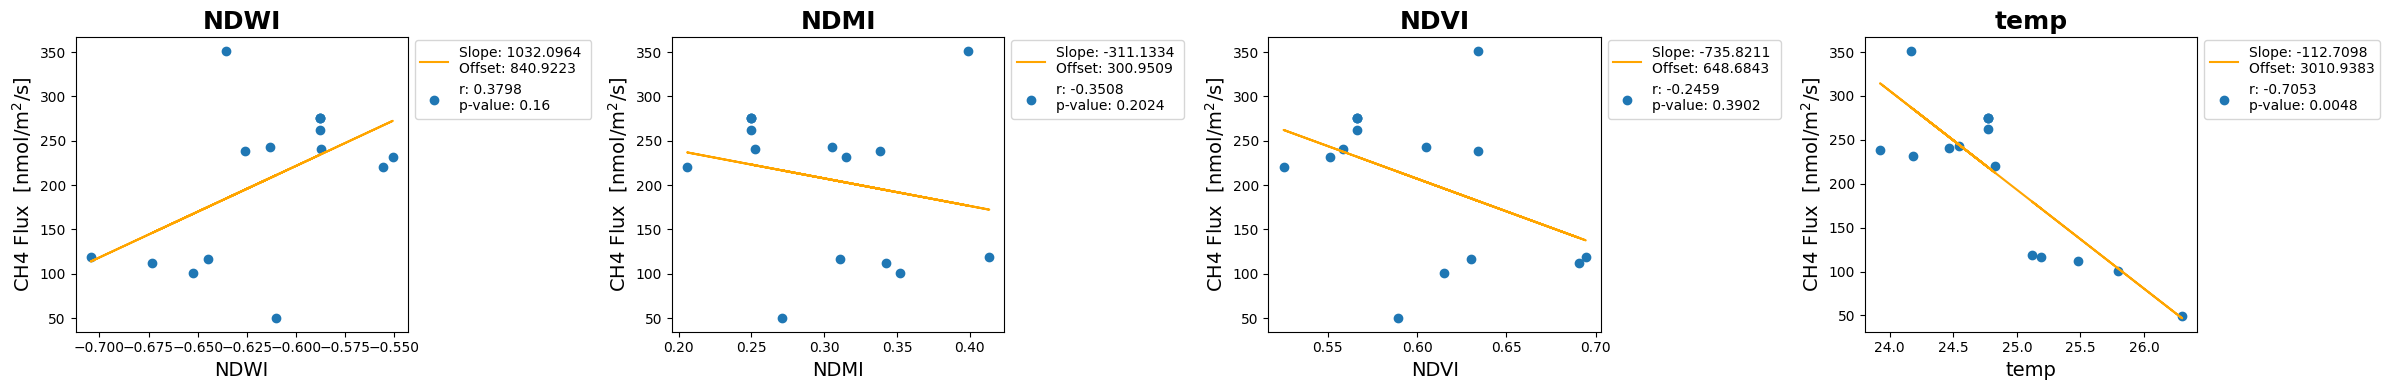

In [65]:
# Doing across years.
compiled_data = ['US-Myb_FFP=201306005-201307005_L8=20130619',
                 'US-Myb_FFP=201405020-201406020_L8=20140606',
#                  'US-Myb_FFP=201505025-201506025_L8=20150625',
#                  'US-Myb_FFP=201606012-201607012_L8=20160627',
#                  'US-Myb_FFP=201706001-201707001_L8=20170614',
#                  'US-Myb_FFP=201806001-201807001_L8=20180617',
#                 'US-Myb_FFP=201906010-201907010_L8=20190620',
#                 'US-Myb_FFP=202006007-202007007_L8=20200622',
                'US-Myb_FFP=202106010-202107010_L8=20210625']
fig1,fig2,compiled_data = compiled_regression(compiled_data,dataPath,correlation='Spearman')

In [64]:
fig1.savefig(regressionPath+'/'+'All_Individual.png')
fig2.savefig(regressionPath+'/'+'Compiled.png')

# Supplemental

Text(0.5, 1.0, 'wind_dir')

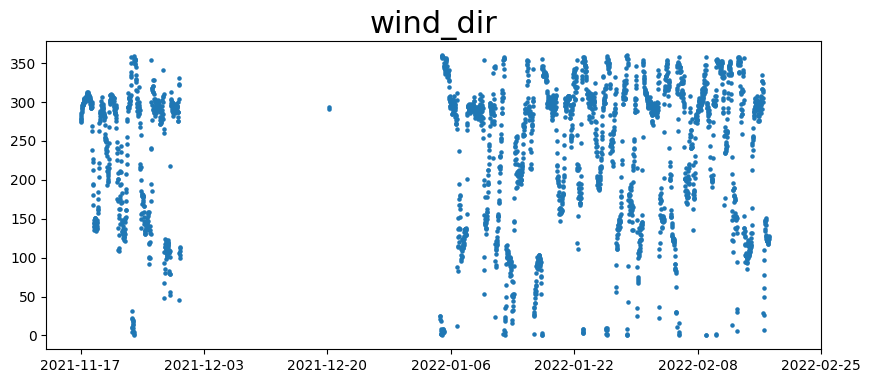

In [152]:
AmerifluxPath = '/Users/darianng/Documents/Msc_Geography/Methane_Hotspot/Site_Data'
os.chdir(AmerifluxPath)
L3 = pd.read_csv('Young_L3.csv',delimiter=',',header=0)
plt.figure(figsize=(10,4))
time_start = "2021-11-17 00:00:00"
time_end = "2022-02-17 23:30:00"
# time_start = 201401010000
# time_end = 201412310000
plot_var = 'wind_dir'
window_start = np.where(L3['DATE']==time_start)[0][0]
window_end = np.where(L3['DATE']==time_end)[0][0]
windowedData = L3[plot_var][window_start:window_end]
# Remove 'nans'
windowedData[windowedData<-1000] = np.nan
plotData = windowedData
# plotData = windowedData[windowedData>-1000]

plt.scatter(np.arange(window_start,window_end),plotData,s=5)
xtick_position = np.arange(window_start,window_end+800,800)
# xtick_labels = L3['month'][xtick_position]
xtick_labels = L3['date.x'][xtick_position]
plt.xticks(xtick_position,xtick_labels)

plt.title(plot_var,fontsize=22)

In [ ]:
#  Myb good
['US-Myb_FFP=201306005-201307005_L8=20130619',
                 'US-Myb_FFP=201405020-201406020_L8=20140606',
                 'US-Myb_FFP=201505025-201506025_L8=20160611',
                 'US-Myb_FFP=201606012-201607012_L8=20160627',
                 'US-Myb_FFP=201706001-201707001_L8=20170614',
                 'US-Myb_FFP=201806001-201807001_L8=20180617']

In [ ]:
plt.pcolormesh(data['ffp']['xr'],data['ffp']['yr'],data['ffp']['ch4'])

# Batch Preruns

In [1282]:
# from thesis_setup import getL8Dates
# Gather names of all stored runs in stored folder
site_name = 'US-WPT'
stored_ffp_path = '/Users/darianng/Documents/MSc_Geography/Methane_Hotspot/FARF_Code/python_code/'\
                        'data/compilation/'+site_name
os.chdir(stored_ffp_path)
full_FileNames = os.listdir(stored_ffp_path)
# Separating out the run info from filenames
ffp_list = np.unique([file.split('fluxMap_')[1].split('_')[1].split('.')[0] for file in full_FileNames if file != '.DS_Store'])
# Matching ffp file names in required_FileNames to matching L8 date in L8_dates
L8_dates = getL8Dates(site_name,getlist=True)
L8_list = []
for run in ffp_list:
    # Added step: ffp records dates stupidly. Need to remove extra 0 in day (i.e. 2021 05 025)
    start = int(run.split('-')[0][:6]+run.split('-')[0][7:])
    end = int(run.split('-')[1][:6]+run.split('-')[1][7:])
    L8_idx = np.where((L8_dates > start) & (L8_dates < end))[0]
    L8_list.append(L8_dates[L8_idx][0])
print(f'\nCheck: L8_list length: {len(L8_list)}, ffp_list: {len(ffp_list)}')

Landsat 8 dates for US-Myb (256 total images):

2013 (24): 
[20130409 20130416 20130603 20130619 20130705 20130705 20130721 20130721
 20130822 20130822 20130907 20130907 20130923 20130923 20131009 20131009
 20131025 20131025 20131110 20131110 20131212 20131212 20131228 20131228]

2014 (32): 
[20140113 20140113 20140318 20140318 20140419 20140419 20140505 20140505
 20140521 20140521 20140606 20140606 20140622 20140622 20140708 20140708
 20140724 20140724 20140809 20140809 20140825 20140825 20140910 20140910
 20140926 20140926 20141012 20141012 20141028 20141028 20141231 20141231]

2015 (28): 
[20150305 20150305 20150321 20150321 20150406 20150406 20150422 20150422
 20150508 20150508 20150524 20150524 20150625 20150625 20150711 20150711
 20150727 20150727 20150812 20150812 20150929 20150929 20151031 20151031
 20151116 20151116 20151218 20151218]

2016 (30): 
[20160204 20160204 20160323 20160323 20160510 20160510 20160526 20160526
 20160611 20160611 20160627 20160627 20160713 20160713 201

In [24]:
Young_ffpList = ['202106029-202107029','202107024-202108023','202108016-202109015','202108025-202109024',
    '202109010-202110010','202109017-202110017','202109026-202110026','202110003-202111002','202110019-202111018',
    '202202027-202203026','202204006-202205006','202205008-202206007','202205031-202206030','202206016-202207016',
    '202207002-202208001','202207011-202208010','202208003-202209002','202208019-202209018','202209013-202210013',
    '202210006-202211005','202210015-202211014','202212009-202301008','202212018-202301017','202301003-202302002',
    '202301026-202302025','202302023-202303022','202303008-202304007']

In [1286]:
# Keeping track
# Young
# L8_list = [20210714,20210808,20210831,20210909,20210925,20211002,20211011,20211018,20211103,
#           20220311,20220421,20220523,20220615,20220701,20220717,20220726,20220818,
#           20220903,20220928,20221021,20221030,20221224,20230102,20230118,20230210,20230307,20230323]
# # Hogg
# removeList = 20210730
# if removeList in L8_list:
#     L8_list.remove(np.array([20210730]))
# L8_list
# # Myb
removeList = 20210217
if removeList in L8_list:
    L8_list.remove(20210217)
# L8_list



In [1287]:
# RUNNING
from thesis import preprocess_maps
from thesis import ffp_clustering
from thesis_setup import thesis_setup
from thesis import save_cluster
import matplotlib.pyplot as plt
import os

site_name = 'US-WPT'

# Folder to save to
save_folder = '/Users/darianng/Documents/Msc_Geography/Methane_Hotspot/FARF_Code/python_code/'\
                'Saved_Data_Cluster_May2023'
# Folder that ffp runs are saved to
ffp_path = '/Users/darianng/Documents/MSc_Geography/Methane_Hotspot/FARF_Code/python_code/data'\
                '/compilation/'+site_name

for run_number in range(len(L8_list)):
    # ffp filename 
    ffp_run_ID = ffp_list[run_number] # e.g.'202107015-202108015'
    # L8 image data 
    L8_run_ID = L8_list[run_number] # e.g. 20221122
    
    # Only perform if this run had not been done before.
    if not os.path.exists(save_folder+'/'+site_name+'_FFP='+ffp_run_ID+'_L8='+str(L8_run_ID)):
        print(f'Running {ffp_run_ID} || {L8_run_ID}  ...  run {run_number}/{len(L8_list)}')
        # Preprocess
        data = preprocess_maps(siteName = site_name,fluxmap_filename = ffp_run_ID,L8_date = L8_run_ID,ffp_datapath = ffp_path)
        # Cluster
        data, fig = ffp_clustering(data,GHG_var='ch4',n_clusters=5)
        plt.close()
        # Save data
        fig1,data = save_cluster(data,save_folder)
        plt.close(); plt.close()
        
        # Saving just data in compilation-specific folder for modelling purposes
        data_fileName = f'/Users/darianng/Documents/MSc_Geography/MSc Thesis/Data/Compilation/{site_name}_Annual/'\
                            f'{data["siteName"]}_FFP={data["run"][1]}_L8={str(data["run"][0])}.p'
        with open(data_fileName, 'wb') as fp:
            pickle.dump(data, fp, protocol=pickle.HIGHEST_PROTOCOL)
print('ALL RUNS DONE!')

Running 202102002-202103001 || 20210305  ...  run 90/103
Beginning resolution matching: /316
0%..15%..31%..47%..63%..79%..94%..DONE
Confirming current Gas: ch4
Figures and data saved to: 
/Users/darianng/Documents/Msc_Geography/Methane_Hotspot/FARF_Code/python_code/Saved_Data_Cluster_May2023/US-Myb_FFP=202102002-202103001_L8=20210305
Running 202102021-202103020 || 20210321  ...  run 91/103
Beginning resolution matching: /328
0%..15%..30%..45%..60%..76%..91%..DONE
Confirming current Gas: ch4
Figures and data saved to: 
/Users/darianng/Documents/Msc_Geography/Methane_Hotspot/FARF_Code/python_code/Saved_Data_Cluster_May2023/US-Myb_FFP=202102021-202103020_L8=20210321
Running 202103006-202104005 || 20210406  ...  run 92/103
Beginning resolution matching: /312
0%..16%..32%..48%..64%..80%..96%..DONE
Confirming current Gas: ch4
Figures and data saved to: 
/Users/darianng/Documents/Msc_Geography/Methane_Hotspot/FARF_Code/python_code/Saved_Data_Cluster_May2023/US-Myb_FFP=202103006-202104005_L8=2

In [1329]:
getL8Dates('Young')

Landsat 8 dates for Young (59 total images):

2021 (20): 
[20210527 20210605 20210612 20210621 20210628 20210707 20210714 20210723
 20210730 20210808 20210815 20210831 20210909 20210916 20210925 20211002
 20211011 20211018 20211103 20211230]

2022 (32): 
[20220106 20220207 20220216 20220223 20220311 20220320 20220327 20220421
 20220428 20220507 20220523 20220608 20220615 20220701 20220710 20220717
 20220726 20220802 20220811 20220818 20220827 20220903 20220912 20220928
 20221005 20221014 20221021 20221030 20221122 20221201 20221217 20221224]

2023 (7): 
[20230102 20230118 20230210 20230219 20230307 20230323 20230330]


# Creating run compilation

Collapsing data to single analysis...half way there...done!


['US-Myb_FFP=201305019-201306018_L8=20130603',
 'US-Myb_FFP=201306004-201307004_L8=20130619',
 'US-Myb_FFP=201306020-201307020_L8=20130705',
 'US-Myb_FFP=201308007-201309006_L8=20130822',
 'US-Myb_FFP=201308023-201309022_L8=20130907',
 'US-Myb_FFP=201309008-201310008_L8=20130923']

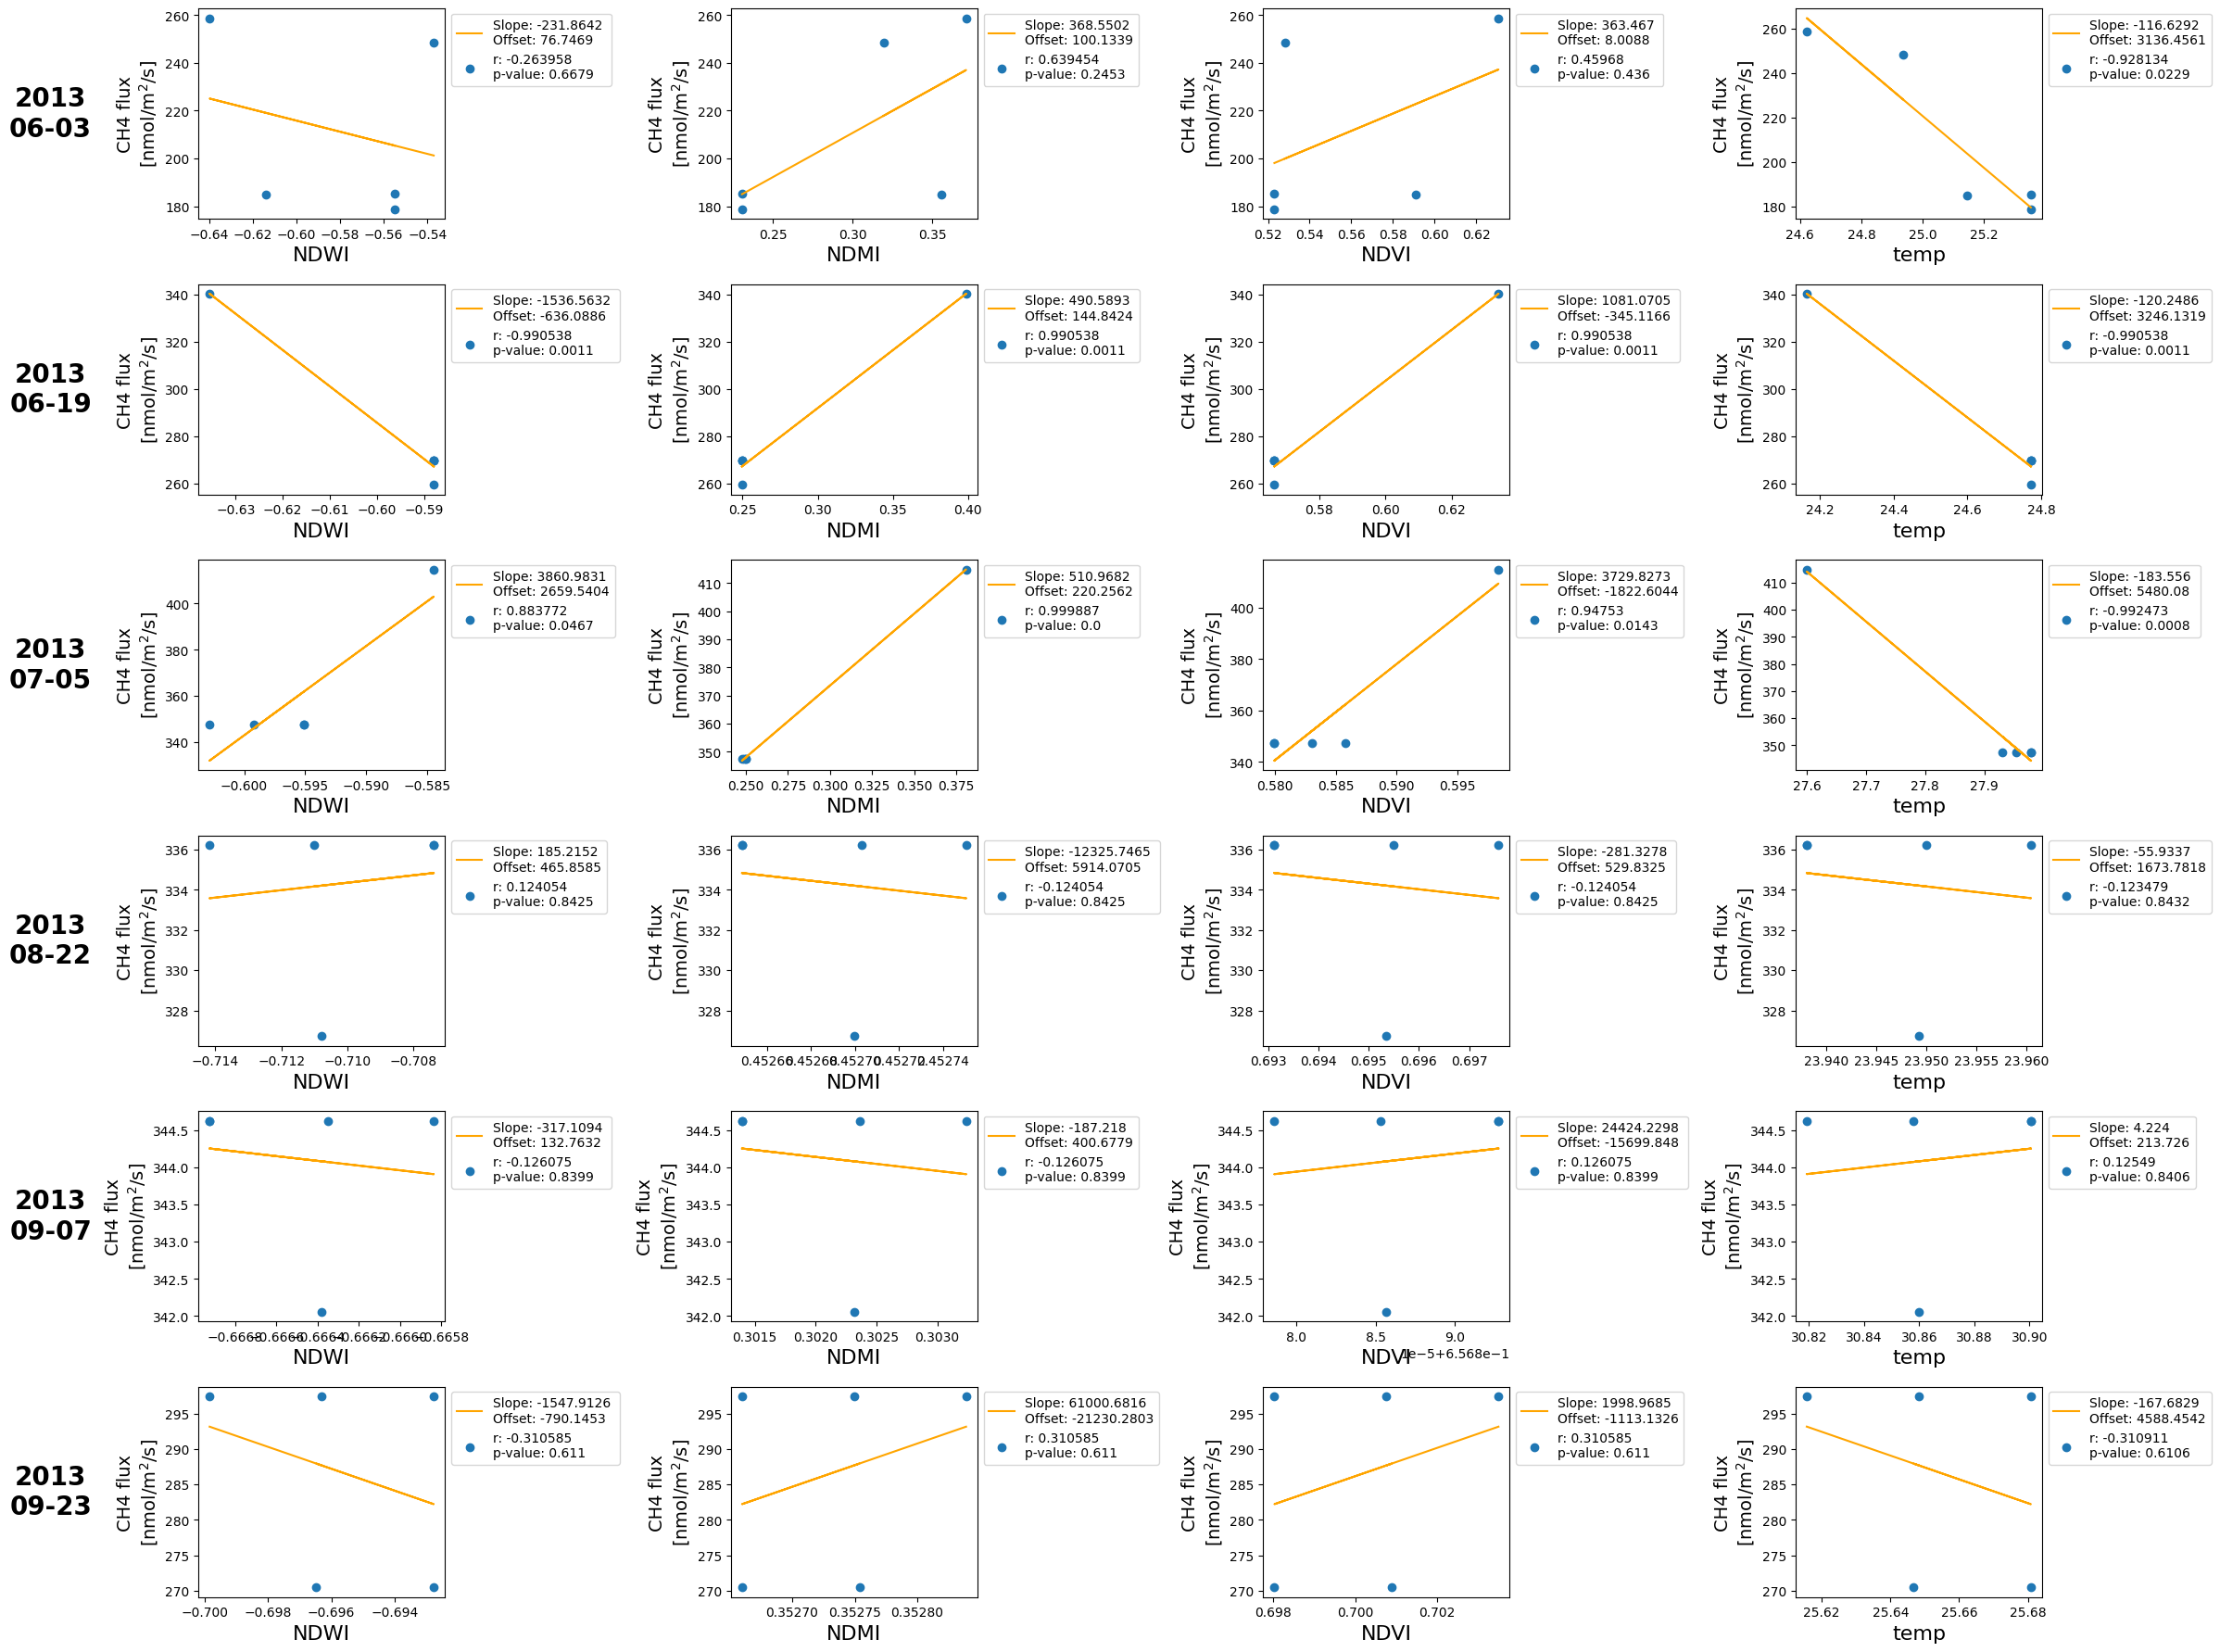

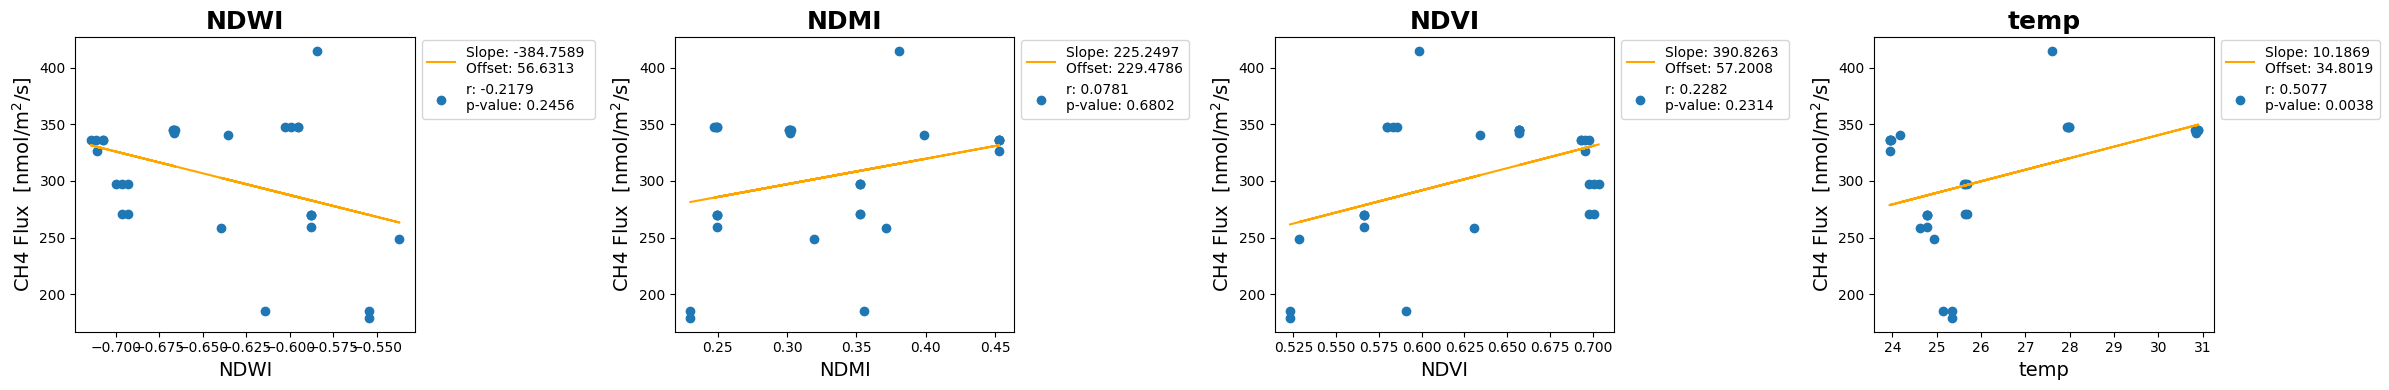

In [1579]:
# Compilation!
import os
from thesis import compiled_regression
import numpy as np
# Folder storing pre-processed and clustered data
folder_path = '/Users/darianng/Documents/Msc_Geography/Methane_Hotspot/FARF_Code/python_code/'\
                    'Saved_Data_Cluster_May2023'


# subfolder_names = []
runs = []
site_name = 'US-Myb'

# Getting all available runs
for root, dirs, files in os.walk(folder_path):
    for dir_name in dirs:
#         subfolder_names.append(os.path.join(root, dir_name))
        if site_name in dir_name:
            runs.append(dir_name)
        
# !! Choose specific period !!
target_year = np.array([2013]) # List specific years
target_month = [5,9] # start,end: range
chosen_runs = []

for run_idx,run in enumerate(runs):
    run_year = int(run.split('L8=')[1][:4])
    run_month = int(run.split('L8=')[1][4:6])
    if np.any(run_year == target_year):
        if run_month >= target_month[0] and run_month <= target_month[1]:
            chosen_runs.append(run)
            
# This just orders the list in ascending date order
def get_last_number(item):
    return int(item.split('L8=')[-1])
chosen_runs = sorted(chosen_runs,key=get_last_number)
# Data from:
dataPath = f'/Users/darianng/Documents/MSc_Geography/MSc Thesis/Data/Compilation/{site_name}_Annual/'
fig1,fig2,compiled_data = compiled_regression(chosen_runs,dataPath,correlation='Pearson')
chosen_runs

# Customized run selection (for modelling)

In [1321]:
# If need to see all available runs to choose from
reGetRuns = 0
if reGetRuns == 1:
    site_name = 'Hogg'
    dataPath = f'/Users/darianng/Documents/MSc_Geography/MSc Thesis'\
                            f'/Data/Compilation/{site_name}_Annual/'
    chosen_runs = [file.split('.')[0] for file in os.listdir(dataPath) if os.path.isfile(file)and file != ".DS_Store"]
sorted(chosen_runs,key=get_last_number)

['Young_FFP=202106029-202107029_L8=20210714',
 'Young_FFP=202107024-202108023_L8=20210808',
 'Young_FFP=202108016-202109015_L8=20210831',
 'Young_FFP=202108025-202109024_L8=20210909',
 'Young_FFP=202109010-202110010_L8=20210925',
 'Young_FFP=202205008-202206007_L8=20220523',
 'Young_FFP=202205031-202206030_L8=20220615',
 'Young_FFP=202206016-202207016_L8=20220701',
 'Young_FFP=202207002-202208001_L8=20220717',
 'Young_FFP=202207011-202208010_L8=20220726',
 'Young_FFP=202208003-202209002_L8=20220818',
 'Young_FFP=202208019-202209018_L8=20220903',
 'Young_FFP=202209013-202210013_L8=20220928']

In [1035]:
# Customize chosen_runs here (to choose what gets left out of model training data):
removeName = 20210730
if removeName in chosen_runs:
    chosen_runs.remove(np.array([20210730]))
L8_list

chosen_runs = ['Young_FFP=202106029-202107029_L8=20210714',
 'Young_FFP=202107024-202108023_L8=20210808',
 'Young_FFP=202108016-202109015_L8=20210831',
 'Young_FFP=202108025-202109024_L8=20210909',
 'Young_FFP=202109010-202110010_L8=20210925',
 'Young_FFP=202205008-202206007_L8=20220523',
 'Young_FFP=202205031-202206030_L8=20220615',
 'Young_FFP=202206016-202207016_L8=20220701',
 'Young_FFP=202207002-202208001_L8=20220717',
 'Young_FFP=202207011-202208010_L8=20220726',
 'Young_FFP=202208019-202209018_L8=20220903',
 'Young_FFP=202209013-202210013_L8=20220928']
# Skipping: 'Young_FFP=202208003-202209002_L8=20220818',
fig1,fig2,compiled_data = compiled_regression(chosen_runs,dataPath,correlation='Spearman')
chosen_runs

['Hogg_FFP=202110003-202111002_L8=20220701',
 'Hogg_FFP=202105028-202106027_L8=20210612',
 'Hogg_FFP=202208019-202209018_L8=20221021',
 'Hogg_FFP=202109017-202110017_L8=20211018',
 'Hogg_FFP=202208003-202209002_L8=20220903',
 'Hogg_FFP=202104026-202105026_L8=20210511',
 'Hogg_FFP=202106029-202107029_L8=20210714',
 'Hogg_FFP=202105012-202106011_L8=20210527',
 'Hogg_FFP=202108016-202109015_L8=20211002',
 'Hogg_FFP=202207018-202208017_L8=20220818',
 'Hogg_FFP=202207002-202208001_L8=20220802',
 'Hogg_FFP=202206016-202207016_L8=20220717',
 'Hogg_FFP=202107015-202108014_L8=20210831']

# Separately save data

In [1578]:
import pickle
import os
SAVE = 1
#        vv  CHANGE THESE  vv
site_name = 'US-Myb'
folder_name = '2020_growing_season'
#        ^^  CHANGE THESE  ^^

savepath = f'/Users/darianng/Documents/MSc_Geography/MSc Thesis/Data/Compilation/{site_name}_Annual/{folder_name}'

month = []
year = []
for i in compiled_data['collapsed_landsat']['period']:
    month.append(int(str(i)[4:6]))
    year.append(int(str(i)[:4]))
compiled_data['collapsed_landsat']['month'] = month
compiled_data['collapsed_landsat']['year'] = year

if SAVE == 1:
#     name_extension = '_2yr_skip20220903'
    name_extension = ''
    os.makedirs(savepath, exist_ok=True)
    fig1.savefig(savepath+'/compiled_individual'+name_extension+'.png')
    fig2.savefig(savepath+'/compiled_single_plot'+name_extension+'.png')
    with open(savepath +'/compiled_data'+name_extension+'.p', 'wb') as fp:
            pickle.dump(compiled_data, fp, protocol=pickle.HIGHEST_PROTOCOL)
    print(f'SAVED! - {savepath}')

SAVED! - /Users/darianng/Documents/MSc_Geography/MSc Thesis/Data/Compilation/US-Myb_Annual/2020_growing_season


In [802]:
str(i)[:4]

'2022'

In [111]:
showAllKeys(compiled_data)

--ALL DATA KEYS--

Key: collected_regression
       ['period', 'r_val', 'p_val', 'landsat', 'ffp']
Key: collapsed_regression
       ['slope', 'offset', 'r_val', 'p_val']
Key: collapsed_landsat
       ['NDWI', 'NDMI', 'NDVI', 'temp']
Key: collapsed_ffp
Key: yfit
       ['slope', 'offset']


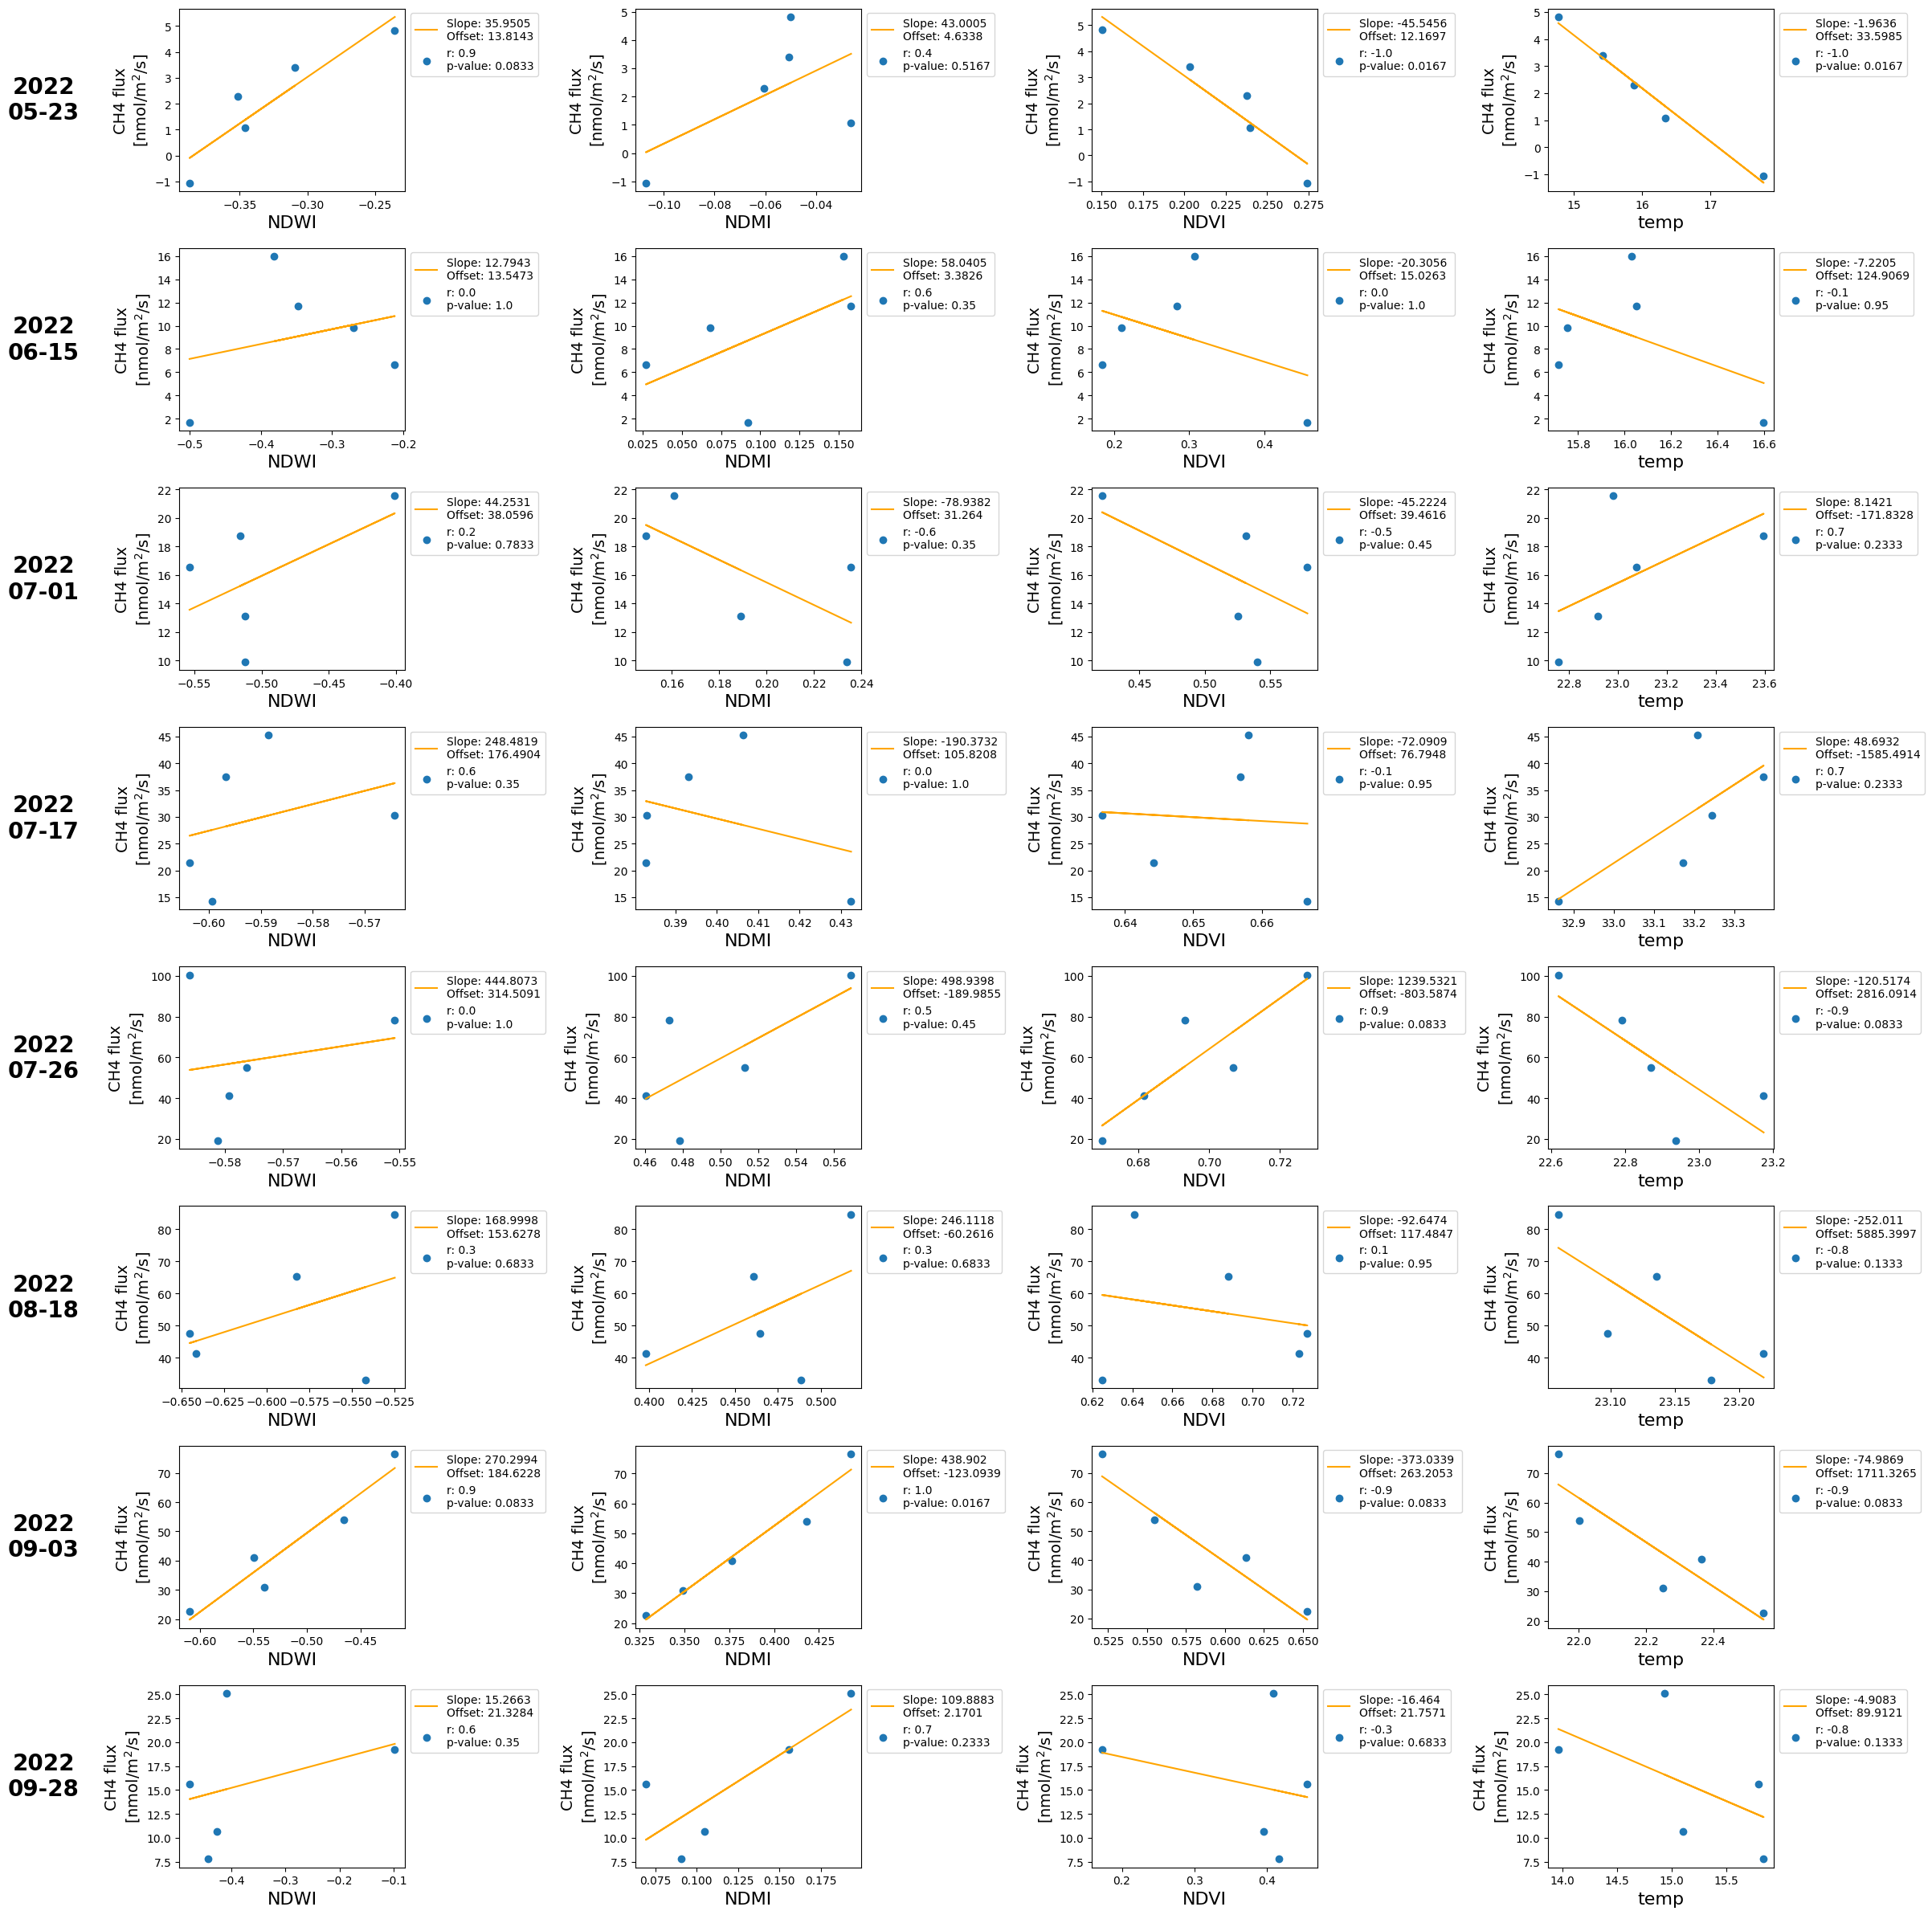

In [11]:
fig1

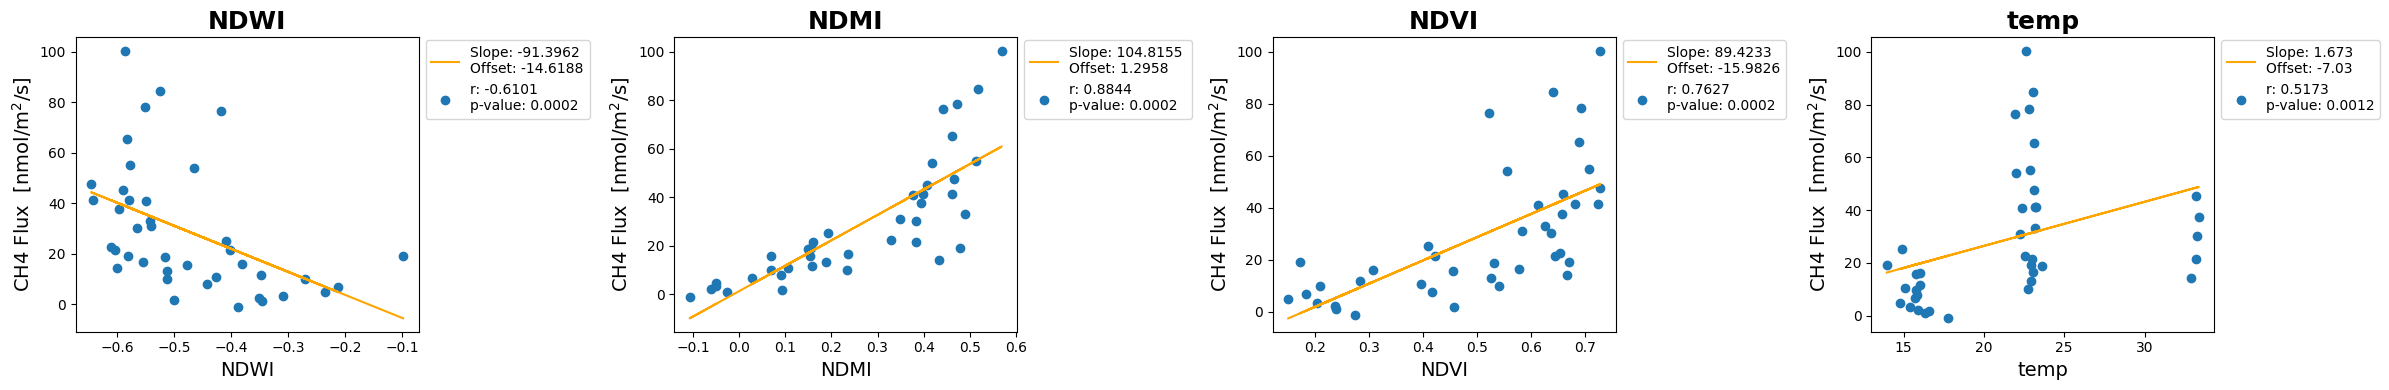

In [17]:
fig2

[20220523, 20220523, 20220523, 20220523, 20220523]
[20220523, 20220523, 20220523, 20220523, 20220523]
[20220523, 20220523, 20220523, 20220523, 20220523]
[20220523, 20220523, 20220523, 20220523, 20220523]


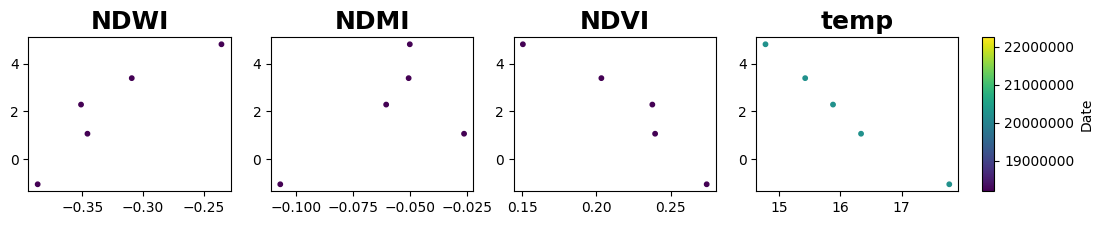

In [49]:
keys = ['NDWI','NDMI','NDVI','temp']
fig,ax = plt.subplots(1,4,figsize=(12,2))
for idx,key in enumerate(keys):
    ax_plot = ax[idx].scatter(compiled_data['collapsed_landsat'][key][:5],compiled_data['collapsed_ffp'][:5],c=compiled_data['collapsed_landsat']['period'][:5],s=10)
    print(compiled_data['collapsed_landsat']['period'][:5])
    ax[idx].set_title(key,fontsize=18,fontweight='bold')
cbar_ax = fig.add_axes([0.92, 0.11, 0.01, 0.77])
cbar1 = fig.colorbar(ax_plot,cax=cbar_ax,format='%.0f',label = 'Date')

Text(0, 0.5, 'FCH4')

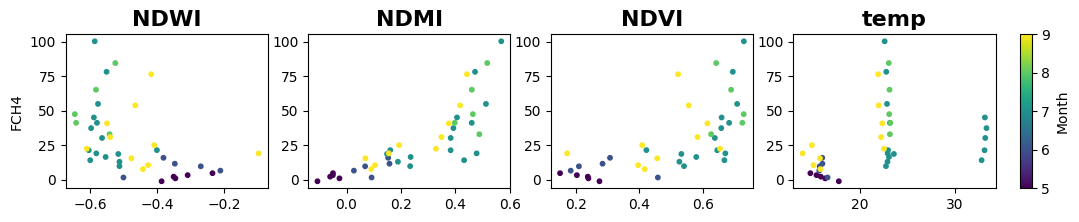

In [40]:
import matplotlib.pyplot as plt
month = []
for i in compiled_data['collapsed_landsat']['period']:
    month.append(int(str(i)[4:6]))
keys = ['NDWI','NDMI','NDVI','temp']
fig,ax = plt.subplots(1,4,figsize=(12,2))
for idx,key in enumerate(keys):
    ax_plot = ax[idx].scatter(compiled_data['collapsed_landsat'][key],compiled_data['collapsed_ffp'],c=month,s=10)
    
    ax[idx].set_title(key,fontsize=16,fontweight='bold')
    

cbar_ax = fig.add_axes([0.92, 0.11, 0.01, 0.77])
cbar1 = fig.colorbar(ax_plot,cax=cbar_ax,format='%.0f',label = 'Month')
ax[0].set_ylabel('FCH4')


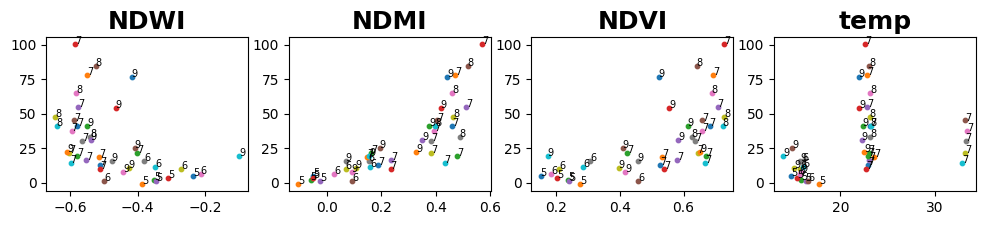

In [109]:
import matplotlib.pyplot as plt
month = []
for i in compiled_data['collapsed_landsat']['period']:
    month.append(int(str(i)[4:6]))
keys = ['NDWI','NDMI','NDVI','temp']
fig,ax = plt.subplots(1,4,figsize=(12,2))

for idx,key in enumerate(keys):
    x_data = compiled_data['collapsed_landsat'][key]
    y_data = compiled_data['collapsed_ffp']
    c_data = compiled_data['collapsed_landsat']['period']
    for i in range(len(x_data)):
        ax_plot = ax[idx].scatter(x_data[i],y_data[i],s=10)
        ax[idx].text(x_data[i],y_data[i],month[i],fontsize=7)
    
    ax[idx].set_title(key,fontsize=18,fontweight='bold')
#     plt.text
# cbar_ax = fig.add_axes([0.92, 0.11, 0.01, 0.77])
# cbar1 = fig.colorbar(ax_plot,cax=cbar_ax,format='%.0f',label = 'Date')


# MLR MODELLING

In [1290]:
import pandas as pd
import numpy as np
model_folder = '/Users/darianng/Documents/MSc_Geography/MSc Thesis/Data/Model/'
model_coeff = pd.read_csv(model_folder+'Young2022_coeff.csv')
model = pd.read_csv(model_folder+'Young2022_fitted.csv')
del model['Unnamed: 0']
model_coeff = model_coeff.rename(columns={'Unnamed: 0': 'x_var'})

model_coeff_stepwise = pd.read_csv(model_folder+'Young21to22_coeff_withyear.csv')
model_stepwise = pd.read_csv(model_folder+'Young21to22_fitted_withyear.csv')
del model_stepwise['Unnamed: 0']
model_coeff_stepwise = model_coeff_stepwise.rename(columns={'Unnamed: 0': 'x_var'})

In [1291]:
# Examine model
model_coeff_stepwise

,x_var,x
0,(Intercept),114.645479
1,month.f6,1007.508491
2,month.f7,27.925110
3,month.f8,-200.444805
4,month.f9,-35.638570
5,year.f2022,-87.488419
6,NDVI,211.790342
7,NDWI,121.033179
8,NDMI,38.189960
9,temp,-9.151658


In [1297]:
def yhat_predict(observation,model_coeff):
    """
    Applying MLR Model:
    yhat = ß0 + ß1*month.f6 + ß2*month.f7 + ß3*month.f8 + ß4*month.f9 +ß5*NDVI + ß6*NDWI + ß7*NDMI + ß8*temp 
           + [ß9,ß10,ß11,ß12]*month.f6,f7,f8,f9*NDVI + [ß13,ß14,ß15,ß16]*month.f6,f7,f8,f9*NDWI + [ß17,ß18,ß19,ß20]*month.f6,f7,f8,f9*NDMI + [ß21,ß22,ß23,ß24]*month.[f6,f7,f8,f9]*temp
    Inputs:
        model = dataframe of landsat 8 map to be used as x-data
        model_coeff = MLR model coefficients
    """
    import numpy as np
    x_var = model_coeff['x_var']
    fixed = []
    interaction = []
    for idx,x_name in enumerate(x_var):
        # x variable coefficient
        b = model_coeff['x'][idx] 
        
        # Fixed effects
        if ".f" not in x_name and x_name != '(Intercept)': 
            X = observation[x_name] # All observation data of this x variable
            fixed.append(X*b)

    # Month factor
    if any("month" in string for string in model_coeff['x_var']): # If month.f exists as a predictor in model
        f6 = model_coeff[model_coeff['x_var'] == 'month.f6'].index[0] # month.f6 index
        f7 = model_coeff[model_coeff['x_var'] == 'month.f7'].index[0] # month.f7 index
        f8 = model_coeff[model_coeff['x_var'] == 'month.f8'].index[0] # month.f8 index
        f9 = model_coeff[model_coeff['x_var'] == 'month.f9'].index[0] # month.f9 index
        factor_map = {5:0,6:model_coeff['x'][f6],7:model_coeff['x'][f7],8:model_coeff['x'][f8],9:model_coeff['x'][f9]}
    else:
        factor_map = {5:0,6:0,7:0,8:0,9:0}
    factor1 = [factor_map[item] for item in observation['month.f']]
    factor = factor1
    # Year factor
    factor_map = {2021:0}
    if any("year" in string for string in model_coeff['x_var']): # If year.f exists as a predictor in model
        for idx,term in enumerate(model_coeff['x_var']):
            if "year" in term and ":" not in term:
                year = int(term.split('.f')[1])
                factor_map[year] = model_coeff['x'][idx]
        factor2 = [factor_map[item] for item in observation['year.f']]
        factor = np.add(factor1,factor2)

    # All interaction terms (interact1 = month.f, interact2 = year.f)
    interact1_terms = [term for string in model_coeff['x_var'] for term in string.split() if ":" in term and "month" in term]
    interact2_terms = [term for string in model_coeff['x_var'] for term in string.split() if ":" in term and "year" in term]
    # All interaction terms' index (1 = month.f, 2 = year.f)
    interact1_terms_idx = [(index) for index, string in enumerate(model_coeff['x_var']) 
                                 if ':' in string and 'month' in string]
    interact2_terms_idx = [(index) for index, string in enumerate(model_coeff['x_var']) 
                                 if ':' in string and 'year' in string]
    
    # Populating dict that can call interaction coefficient by the term name.
    interact_dict = {'month.f':{},'year.f':{}}
    # populating ß for month.f interaction
    for i,term in enumerate(interact1_terms):
        interact_dict['month.f'][term]=model_coeff['x'][interact1_terms_idx[i]]
    # populating ß for year.f interaction
    for i,term in enumerate(interact2_terms):
        interact_dict['year.f'][term]=model_coeff['x'][interact2_terms_idx[i]]
    # All fixed terms that get interacted with.
    interact1_fixed = np.unique([string.split(':')[1] for string in model_coeff['x_var'] if ":" in string and "month" in string])
    interact2_fixed = np.unique([string.split(':')[1] for string in model_coeff['x_var'] if ":" in string and "year" in string])
    
    # Iterating through each i in xi
    interaction = []
    # 1st factor: month.f
    for i,month in enumerate(observation['month.f']):
        total_term = 0
        # Month factor
        if month != 5: # if not intercept month
            for fixed_term in interact1_fixed:
                coeff_name = 'month.f'+str(month)+':'+fixed_term
                current_term = interact_dict['month.f'][coeff_name] * observation[fixed_term][i]
                total_term += current_term 
        # 2nd factor: year.f if it exists as a predictor
        if 'year.f' in observation.keys():
            year = observation['year.f'][i]
            if year != min(observation['year.f']): #if not intercept year
                
                for fixed_term in interact2_fixed:
                    coeff_name = 'year.f'+str(year)+':'+fixed_term
                    current_term = interact_dict['year.f'][coeff_name] * observation[fixed_term][i]
                    total_term += current_term
                
        interaction.append(total_term)
    
    # Summing
    summed_fixed = [sum(element) for element in zip(*fixed)]

    yhat_pred = [sum(element)+model_coeff['x'][0] for element in zip(summed_fixed,factor,interaction)]

    return yhat_pred

# Predicting on Single Footprint-weighted Flux Map (non-clustered)

In [1295]:
# ['Young_FFP=202106029-202107029_L8=20210714',
#  'Young_FFP=202107024-202108023_L8=20210808',
#  'Young_FFP=202108016-202109015_L8=20210831',
#  'Young_FFP=202108025-202109024_L8=20210909',
#  'Young_FFP=202109010-202110010_L8=20210925',]

In [1306]:
from thesis import preprocess_maps

ffp_path = '/Users/darianng/Documents/MSc_Geography/Methane_Hotspot/FARF_Code/python_code/data/compilation/Young'
data = preprocess_maps(siteName = 'Young',fluxmap_filename = '202106029-202107029',L8_date = 20210714,ffp_datapath = ffp_path)
# Creating the new DataFrame
columns_to_select = ['NDVI','NDWI','NDMI','temp']
observation = pd.DataFrame({col: data['landsat'][col] for col in columns_to_select})
month = [int(str(data['run'][0])[4:6])]*len(observation['NDVI'])
year = [int(str(data['run'][0])[:4])]*len(observation['NDVI'])
observation['month.f'] = month
observation['year.f'] = year

Beginning resolution matching: /471
0%..10%..21%..31%..42%..53%..63%..74%..84%..95%..DONE


In [1307]:
yhat_pred = yhat_predict(observation=observation,model_coeff=model_coeff_stepwise)
print(f'Check length: {len(yhat_pred)}')

Check length: 471


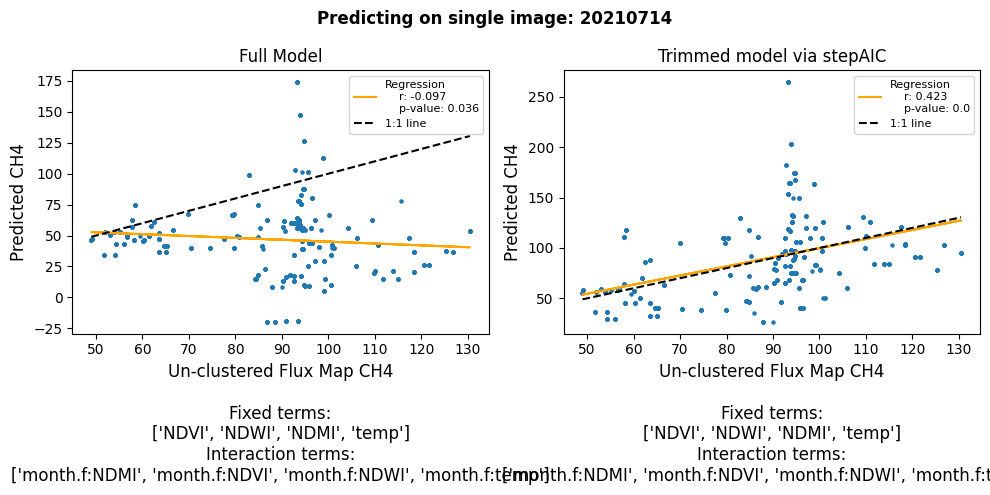

In [1308]:
from scipy import stats
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
yhat_pred = yhat_predict(observation=observation,model_coeff=model_coeff)
# Model details:
fixed_terms = [term for string in model_coeff['x_var'] for term in string.split() if ".f" not in term][1:]
interaction_fixed = np.unique([term.split(':')[1] for string in model_coeff['x_var'] for term in string.split() if ":" in term])
interaction_terms = ['month.f:'+term for term in interaction_fixed]
x_data= data['matched_ffp']['ch4']
y_data = yhat_pred
# Regression data
plt.scatter(x_data,y_data,s=5)
m, b = np.polyfit(x_data,y_data,1)
yfit_line = m*np.array(x_data)+b
r_val, p_val = stats.pearsonr(x_data,y_data); corr = f'Regression\n    r: {np.round(r_val,3)} \n    p-value: {np.round(p_val,3)}'
plt.plot(x_data,yfit_line,'orange',label=corr)

plt.plot([min(x_data),max(x_data)],[min(x_data),max(x_data)],'--k',label='1:1 line')
plt.ylabel(f'Predicted CH4',fontsize=12); 
plt.xlabel(f'Un-clustered Flux Map CH4\n\nFixed terms:\n{fixed_terms}\nInteraction terms:\n{interaction_terms}',fontsize=12)
plt.title(f'Full Model')
plt.legend(fontsize=8)

plt.subplot(1,2,2)
yhat_pred = yhat_predict(observation=observation,model_coeff=model_coeff_stepwise)
# Model details:
fixed_terms = [term for string in model_coeff_stepwise['x_var'] for term in string.split() if ".f" not in term][1:]
interaction_fixed = np.unique([term.split(':')[1] for string in model_coeff_stepwise['x_var'] for term in string.split() if ":" in term])
interaction_terms = ['month.f:'+term for term in interaction_fixed]
x_data= data['matched_ffp']['ch4']
y_data = yhat_pred
# Regression data
plt.scatter(x_data,y_data,s=5)
m, b = np.polyfit(x_data,y_data,1)
yfit_line = m*np.array(x_data)+b
r_val, p_val = stats.pearsonr(x_data,y_data); corr = f'Regression\n    r: {np.round(r_val,3)} \n    p-value: {np.round(p_val,3)}'
plt.plot(x_data,yfit_line,'orange',label=corr)

plt.plot([min(x_data),max(x_data)],[min(x_data),max(x_data)],'--k',label='1:1 line')
plt.ylabel(f'Predicted CH4',fontsize=12)
plt.xlabel(f'Un-clustered Flux Map CH4\n\nFixed terms:\n{fixed_terms}\nInteraction terms:\n{interaction_terms}',fontsize=12)
plt.title(f'Trimmed model via stepAIC')
plt.suptitle(f'Predicting on single image: {data["run"][0]}',fontweight='bold')
plt.legend(fontsize=8)
plt.tight_layout()

# Predicting on Single Footprint-weighted Flux Map (clustered)

In [1310]:
from thesis import preprocess_maps
from thesis import ffp_clustering

ffp_path = '/Users/darianng/Documents/MSc_Geography/Methane_Hotspot/FARF_Code/python_code/data/compilation/Young'
data = preprocess_maps(siteName = 'Young',fluxmap_filename = '202106029-202107029',L8_date = 20210714,ffp_datapath = ffp_path)
data, fig = ffp_clustering(data,GHG_var='ch4',n_clusters=5)
plt.close()
# Creating the new DataFrame
columns_to_select = ['NDVI','NDWI','NDMI','temp']
observation = pd.DataFrame({col: data['clustered_landsat'][col] for col in columns_to_select})
month = [int(str(data['run'][0])[4:6])]*len(observation['NDVI'])
year = [int(str(data['run'][0])[:4])]*len(observation['NDVI'])
observation['month.f'] = month
observation['year.f'] = year

Beginning resolution matching: /471
0%..10%..21%..31%..42%..53%..63%..74%..84%..95%..DONE
Confirming current Gas: ch4


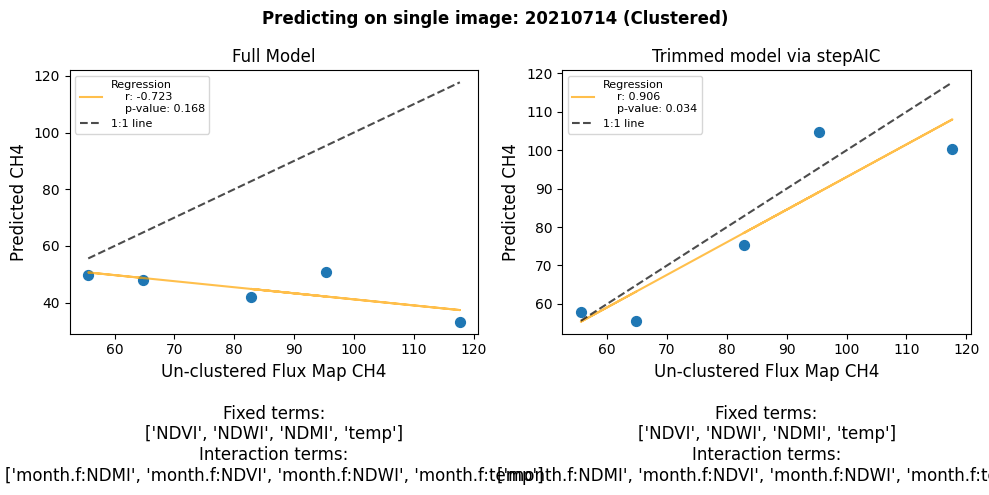

In [1311]:
from scipy import stats
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
yhat_pred = yhat_predict(observation=observation,model_coeff=model_coeff)
# Model details:
fixed_terms = [term for string in model_coeff['x_var'] for term in string.split() if ".f" not in term][1:]
interaction_fixed = np.unique([term.split(':')[1] for string in model_coeff['x_var'] for term in string.split() if ":" in term])
interaction_terms = ['month.f:'+term for term in interaction_fixed]
x_data= data['clustered_ffp']
y_data = yhat_pred
# Regression data
plt.scatter(x_data,y_data,s=50)
m, b = np.polyfit(x_data,y_data,1)
yfit_line = m*np.array(x_data)+b
r_val, p_val = stats.pearsonr(x_data,y_data); corr = f'Regression\n    r: {np.round(r_val,3)} \n    p-value: {np.round(p_val,3)}'
plt.plot(x_data,yfit_line,'orange',label=corr,alpha=0.7)

plt.plot([min(x_data),max(x_data)],[min(x_data),max(x_data)],'--k',label='1:1 line',alpha=0.7)
plt.ylabel(f'Predicted CH4',fontsize=12); 
plt.xlabel(f'Un-clustered Flux Map CH4\n\nFixed terms:\n{fixed_terms}\nInteraction terms:\n{interaction_terms}',fontsize=12)
plt.title(f'Full Model')
plt.legend(fontsize=8)

plt.subplot(1,2,2)
yhat_pred = yhat_predict(observation=observation,model_coeff=model_coeff_stepwise)
# Model details:
fixed_terms = [term for string in model_coeff_stepwise['x_var'] for term in string.split() if ".f" not in term][1:]
interaction_fixed = np.unique([term.split(':')[1] for string in model_coeff_stepwise['x_var'] for term in string.split() if ":" in term])
interaction_terms = ['month.f:'+term for term in interaction_fixed]
x_data= data['clustered_ffp']
y_data = yhat_pred
# Regression data
plt.scatter(x_data,y_data,s=50)
m, b = np.polyfit(x_data,y_data,1)
yfit_line = m*np.array(x_data)+b
r_val, p_val = stats.pearsonr(x_data,y_data); corr = f'Regression\n    r: {np.round(r_val,3)} \n    p-value: {np.round(p_val,3)}'
plt.plot(x_data,yfit_line,'orange',label=corr,alpha=0.7)

plt.plot([min(x_data),max(x_data)],[min(x_data),max(x_data)],'--k',label='1:1 line',alpha=0.7)
plt.ylabel(f'Predicted CH4',fontsize=12)
plt.xlabel(f'Un-clustered Flux Map CH4\n\nFixed terms:\n{fixed_terms}\nInteraction terms:\n{interaction_terms}',fontsize=12)
plt.title(f'Trimmed model via stepAIC')
plt.suptitle(f'Predicting on single image: {data["run"][0]} (Clustered)',fontweight='bold')
plt.legend(fontsize=8)
plt.tight_layout()

# Predicting on another year's growing season

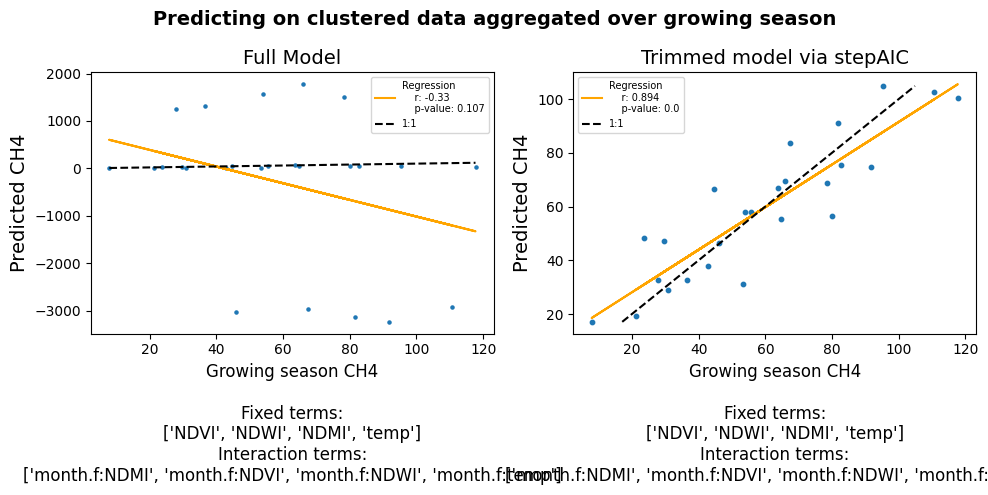

In [1316]:
import pickle
with open('/Users/darianng/Documents/MSc_Geography/MSc Thesis/Data/Compilation/Young_Annual/2021_growing_season/compiled_data.p', 'rb') as fp:
    growing_2021 = pickle.load(fp)
# Making model-formatted dataframe
columns_to_select = ['NDVI','NDWI','NDMI','temp']
observation = pd.DataFrame({col: growing_2021['collapsed_landsat'][col] for col in columns_to_select})
observation['month.f'] = growing_2021['collapsed_landsat']['month']
observation['year.f'] = [int(str(run)[:4]) for run in growing_2021['collapsed_landsat']['period']]

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
yhat_pred = yhat_predict(observation=observation,model_coeff=model_coeff)
fixed_terms = [term for string in model_coeff['x_var'] for term in string.split() if ".f" not in term][1:]
interaction_fixed = np.unique([term.split(':')[1] for string in model_coeff['x_var'] for term in string.split() if ":" in term])
interaction_terms = ['month.f:'+term for term in interaction_fixed]

x_data= growing_2021['collapsed_ffp']
y_data = yhat_pred
# Regression data
plt.scatter(x_data,y_data,s=5)
m, b = np.polyfit(x_data,y_data,1)
yfit_line = m*np.array(x_data)+b
r_val, p_val = stats.pearsonr(x_data,y_data); corr = f'Regression\n    r: {np.round(r_val,3)} \n    p-value: {np.round(p_val,3)}'
plt.plot(x_data,yfit_line,'orange',label=corr)

plt.plot([min(x_data),max(x_data)],[min(x_data),max(x_data)],'--k',label='1:1')
plt.ylabel('Predicted CH4',fontsize=14)
plt.xlabel(f'Growing season CH4\n\nFixed terms:\n{fixed_terms}\nInteraction terms:\n{interaction_terms}',fontsize=12)
plt.title('Full Model',fontsize=14)
plt.legend(fontsize=7)

plt.subplot(1,2,2)
yhat_pred = yhat_predict(observation=observation,model_coeff=model_coeff_stepwise)
fixed_terms = [term for string in model_coeff_stepwise['x_var'] for term in string.split() if ".f" not in term][1:]
interaction_fixed = np.unique([term.split(':')[1] for string in model_coeff_stepwise['x_var'] for term in string.split() if ":" in term])
interaction_terms = ['month.f:'+term for term in interaction_fixed]

x_data= growing_2021['collapsed_ffp']
y_data = yhat_pred
# Regression data
plt.scatter(x_data,y_data,s=10)
m, b = np.polyfit(x_data,y_data,1)
yfit_line = m*np.array(x_data)+b
r_val, p_val = stats.pearsonr(x_data,y_data); corr = f'Regression\n    r: {np.round(r_val,3)} \n    p-value: {np.round(p_val,3)}'
plt.plot(x_data,yfit_line,'orange',label=corr)

plt.plot([min(yhat_pred),max(yhat_pred)],[min(yhat_pred),max(yhat_pred)],'--k',label='1:1')
plt.ylabel('Predicted CH4',fontsize=14)
plt.xlabel(f'Growing season CH4\n\nFixed terms:\n{fixed_terms}\nInteraction terms:\n{interaction_terms}',fontsize=12)
plt.title(f'Trimmed model via stepAIC',fontsize=14)
plt.suptitle(f'Predicting on clustered data aggregated over growing season',fontweight='bold',fontsize=14)
plt.legend(fontsize=7)
plt.tight_layout()

In [254]:
showAllKeys(growing_2021)

--ALL DATA KEYS--

Key: collected_regression
       ['period', 'r_val', 'p_val', 'landsat', 'ffp']
Key: collapsed_regression
       ['slope', 'offset', 'r_val', 'p_val']
Key: collapsed_landsat
       ['NDWI', 'NDMI', 'NDVI', 'temp', 'period', 'month']
Key: collapsed_ffp
Key: yfit
       ['slope', 'offset']


In [1319]:
showAllKeys(growing_2021)

--ALL DATA KEYS--

Key: collected_regression
       ['period', 'r_val', 'p_val', 'landsat', 'ffp']
Key: collapsed_regression
       ['slope', 'offset', 'r_val', 'p_val']
Key: collapsed_landsat
       ['NDWI', 'NDMI', 'NDVI', 'temp', 'period', 'month']
Key: collapsed_ffp
Key: yfit
       ['slope', 'offset']


In [ ]:
# Old model calculation
import numpy as np
# Calculating yhat using MLR coefficients
def yhat_predict(model,model_coeff):
    """
    Applying MLR Model:
    yhat = ß0 + ß1*month.f6 + ß2*month.f7 + ß3*month.f8 + ß4*month.f9 +ß5*NDVI + ß6*NDWI + ß7*NDMI + ß8*temp 
           + [ß9,ß10,ß11,ß12]*month.f6,f7,f8,f9*NDVI + [ß13,ß14,ß15,ß16]*month.f6,f7,f8,f9*NDWI + [ß17,ß18,ß19,ß20]*month.f6,f7,f8,f9*NDMI + [ß21,ß22,ß23,ß24]*month.[f6,f7,f8,f9]*temp
    Inputs:
        model = dataframe of landsat 8 map to be used as x-data
        model_coeff = MLR model coefficients
    """
    b = model_coeff['x']
    yhat_pred = []
    for ii in range(len(model['NDVI'])):
        NDVI = model['NDVI'][ii]; NDMI = model['NDMI'][ii]
        NDWI = model['NDWI'][ii]; temp = model['temp'][ii]
        month = model['month.f'][ii]
        # Fixed effects
        fixed = np.sum(b[5]*NDVI + b[6]*NDWI + b[7]*NDMI + b[8]*temp)
        # Factor & interaction
        if month == 5:
            factor = 0
            interaction = 0
        else:
            factor = b[month-5] #shortcut to relate month# with ß#
            interaction = np.sum(b[month+3]*NDVI + b[month+7]*NDWI + b[month+11]*NDMI + b[month+15]*temp)

        yhat_calc = b[0] + fixed + factor + interaction
        yhat_pred.append(yhat_calc)
    return yhat_pred

In [1260]:
yhat_pred = yhat_predict(observation=model_stepwise,model_coeff=model_coeff_stepwise)

In [1083]:
import pandas as pd
import numpy as np
model_folder = '/Users/darianng/Documents/MSc_Geography/MSc Thesis/Data/Model/'
model_coeff = pd.read_csv(model_folder+'Young2022_coeff.csv')
model = pd.read_csv(model_folder+'Young2022_fitted.csv')
del model['Unnamed: 0']
model_coeff = model_coeff.rename(columns={'Unnamed: 0': 'x_var'})

model_coeff_stepwise = pd.read_csv(model_folder+'Young21to22_coeff_withyear.csv')
model_stepwise = pd.read_csv(model_folder+'Young21to22_fitted_withyear.csv')
del model_stepwise['Unnamed: 0']
model_coeff_stepwise = model_coeff_stepwise.rename(columns={'Unnamed: 0': 'x_var'})


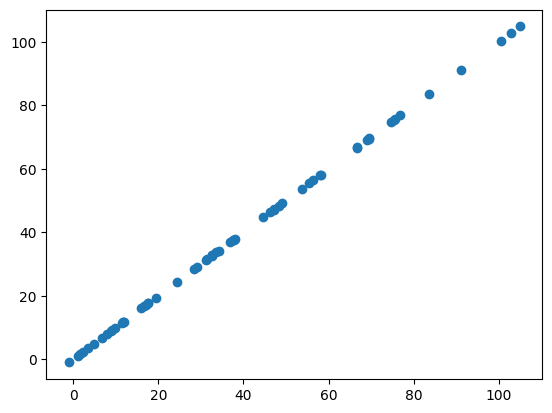

In [1261]:
plt.scatter(model_stepwise['fitted'],yhat_pred)

# Collected regression analysis

In [1620]:
# Loading all data
compilationPath = '/Users/darianng/Documents/MSc_Geography/MSc Thesis/Data/Compilation/'
collected = {'Young':{},'Hogg':{},'US-WPT':{},'US-Myb':{}}
site = ['Young','Hogg']
period = ['2021','2022','21to23']
for this_site in site:
    for this_period in period:
        with open(compilationPath+this_site+'_Annual/'+this_period+'_growing_season/compiled_data.p', 'rb') as fp:
            collected[this_site][this_period] = pickle.load(fp)
this_site = 'US-WPT'
this_period = '2013'
with open(compilationPath+this_site+'_Annual/'+this_period+'_growing_season/compiled_data.p', 'rb') as fp:
    collected[this_site][this_period] = pickle.load(fp)
this_site = 'US-Myb'
this_period = '2013to2021'
with open(compilationPath+this_site+'_Annual/'+this_period+'_growing_season/compiled_data.p', 'rb') as fp:
    collected[this_site][this_period] = pickle.load(fp)
    

In [1621]:
showAllKeys(collected['Young']['2021'])

--ALL DATA KEYS--

Key: collected_regression
       ['period', 'r_val', 'p_val', 'landsat', 'ffp']
Key: collapsed_regression
       ['slope', 'offset', 'r_val', 'p_val']
Key: collapsed_landsat
       ['NDWI', 'NDMI', 'NDVI', 'temp', 'period', 'month']
Key: collapsed_ffp
Key: yfit
       ['slope', 'offset']


# Getting regression data for each dataset

In [1622]:
from scipy import stats
# Getting regression data for each dataset
regression = {'Young':{'2021':{},'2022':{},'21to23':{}},'Hogg':{'2021':{},'2022':{}},
              'US-WPT':{'2013':{}},'US-Myb':{}}
this_reg = {'r_val_pear':{'NDVI':[],'NDWI':[],'NDMI':[],'temp':[]},
            'p_val_pear':{'NDVI':[],'NDWI':[],'NDMI':[],'temp':[]},
            'r_val_spear':{'NDVI':[],'NDWI':[],'NDMI':[],'temp':[]},
            'p_val_spear':{'NDVI':[],'NDWI':[],'NDMI':[],'temp':[]},
            'period':[]}

indexes = ['NDVI','NDWI','NDMI','temp']
sites = ['Young','Hogg','US-WPT','US-Myb']
year = '2021'
for site in sites:
    for year in collected[site].keys():
        this_reg = {'r_val_pear':{'NDVI':[],'NDWI':[],'NDMI':[],'temp':[]},
            'p_val_pear':{'NDVI':[],'NDWI':[],'NDMI':[],'temp':[]},
            'r_val_spear':{'NDVI':[],'NDWI':[],'NDMI':[],'temp':[]},
            'p_val_spear':{'NDVI':[],'NDWI':[],'NDMI':[],'temp':[]},
            'slope':{'NDVI':[],'NDWI':[],'NDMI':[],'temp':[]},
            'offset':{'NDVI':[],'NDWI':[],'NDMI':[],'temp':[]},
            'period':[]}
        for ii,date in enumerate(collected[site][year]['collected_regression']['period']):
            y_data = collected[site][year]['collected_regression']['ffp'][ii]
            for index in indexes:
                x_data = collected[site][year]['collected_regression']['landsat'][ii][index]

                m, b = np.polyfit(x_data,y_data,1)
                r_val_pear, p_val_pear = stats.pearsonr(x_data,y_data)
                r_val_spear, p_val_spear = stats.spearmanr(x_data,y_data)
                perm = stats.permutation_test((x_data,), statistic, permutation_type='pairings')
                p_val_spear = perm.pvalue

                this_reg['r_val_pear'][index].append(r_val_pear)
                this_reg['p_val_pear'][index].append(p_val_pear)
                this_reg['r_val_spear'][index].append(r_val_spear)
                this_reg['p_val_spear'][index].append(p_val_spear)
                this_reg['slope'][index].append(m)
                this_reg['offset'][index].append(b)
            this_reg['period'].append(date.split('L8=')[1])
        regression[site][year] = this_reg
        

# Getting statistics on regression results

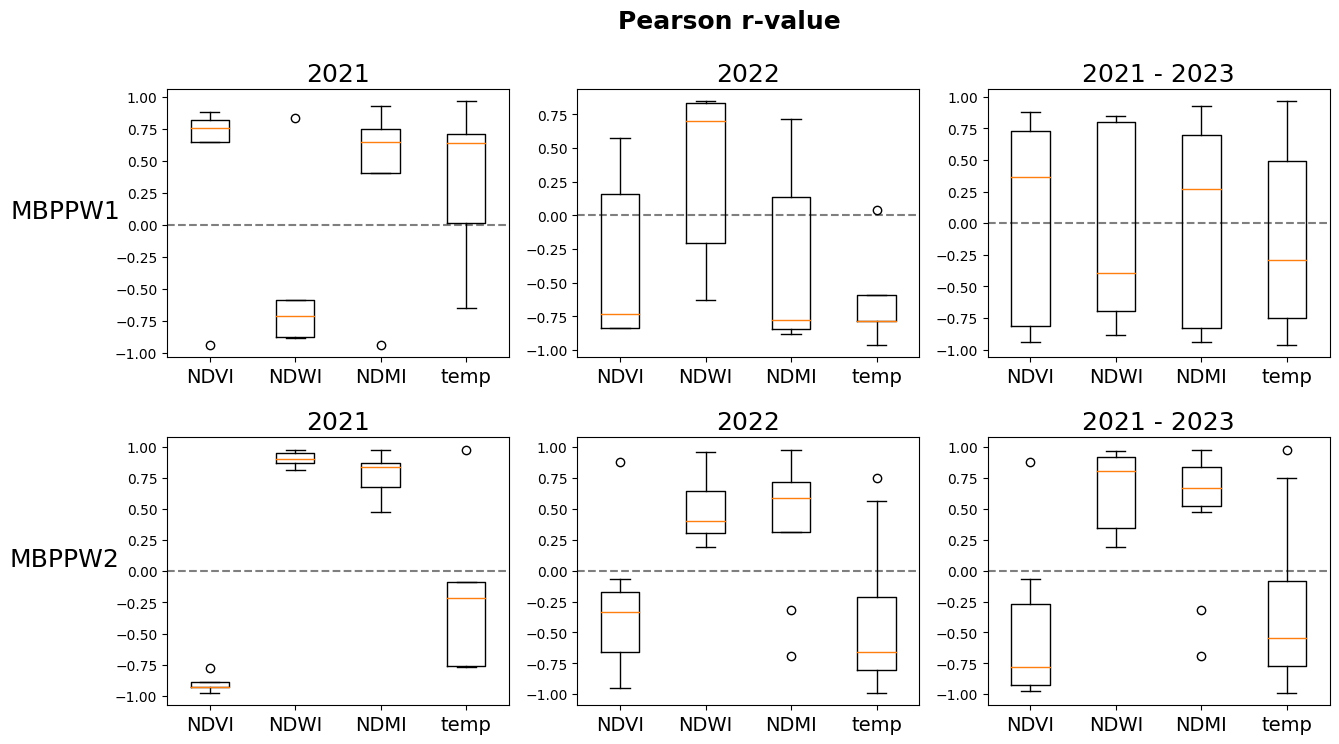

In [1623]:
sites = ['Hogg','Young']

stat_indices = ['r_val_pear','p_val_pear','r_val_spear','p_val_spear']
fig,ax = plt.subplots(len(sites),3,figsize=(15,4*len(sites)))
for row,site in enumerate(sites):
    for col,year in enumerate(regression[site].keys()):
        boxdata = [] # Holding data for all 4 indexes
        for index in indexes:
            
            # Data for box plots. 4 columns of indices
            boxdata.append(regression[site][year]['r_val_pear'][index])
            
            # Saving mean value for each stat. Add key to regression{}
            for stat in stat_indices:
                # Saving to regression{}
                regression[site][year][stat][f'{index}_mean'] = np.mean(regression[site][year][stat][index])

        ax[row][col].boxplot(boxdata)
        ax[row][col].set_title(year,fontsize=18)
        ax[row][col].set_xticklabels(['NDVI', 'NDWI', 'NDMI', 'temp'],fontsize=14)
        ax[row][col].axhline(0,c='k',linestyle='--',alpha=0.5)
ax[0,2].set_title('2021 - 2023',fontsize=18)
ax[1,2].set_title('2021 - 2023',fontsize=18)
ax[0][0].set_ylabel('MBPPW1',fontsize=18,rotation=0,labelpad=36)
ax[1][0].set_ylabel('MBPPW2',fontsize=18,rotation=0,labelpad=36)
fig.suptitle('Pearson r-value',fontsize=18,fontweight='bold')
plt.subplots_adjust(hspace=0.3)
# fig.savefig('/Users/darianng/Documents/Msc_Geography/Msc Thesis/Figures/Potential/Young_Hogg_r_boxplot.png')

In [1563]:
print('             check                  regression')
stat_check = 'r_val_pear'
for site in sites:
    print(f'||{site}||')
    for year in regression[site].keys():
        print(f'  {year}')
        for index in indexes:
            
            print(f"{index} - {np.mean(regression[site][year][stat_check][index])},  {regression[site][year][stat_check][f'{index}_mean']}")

             check                  regression
||Young||
  2021
NDVI - -0.9008640981240683,  -0.9008640981240683
NDWI - 0.8992996079837319,  0.8992996079837319
NDMI - 0.7648552508151518,  0.7648552508151518
temp - -0.17141122800243075,  -0.17141122800243075
  2022
NDVI - -0.3121201516579859,  -0.3121201516579859
NDWI - 0.501283504193931,  0.501283504193931
NDMI - 0.39625790739381206,  0.39625790739381206
temp - -0.39267388817675064,  -0.39267388817675064
  21to23
NDVI - -0.5385601310680175,  -0.5385601310680175
NDWI - 0.654366621036162,  0.654366621036162
NDMI - 0.5380261164020197,  0.5380261164020197
temp - -0.3075728650327815,  -0.3075728650327815
||Hogg||
  2021
NDVI - 0.43269448310044006,  0.43269448310044006
NDWI - -0.44568991740884795,  -0.44568991740884795
NDMI - 0.35727330291136383,  0.35727330291136383
temp - 0.3337724637970604,  0.3337724637970604
  2022
NDVI - -0.33558104151825285,  -0.33558104151825285
NDWI - 0.3095318906255085,  0.3095318906255085
NDMI - -0.330825394449792

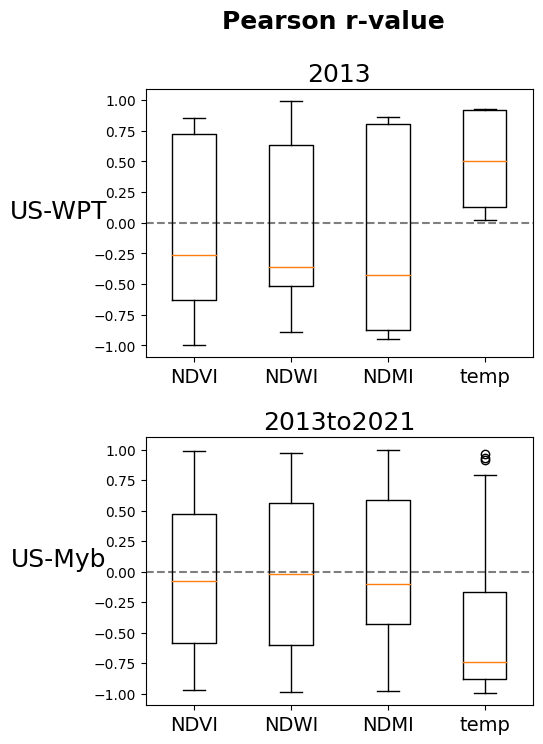

In [1496]:
sites = ['US-WPT','US-Myb']
fig,ax = plt.subplots(len(sites),1,figsize=(5,4*len(sites)))
for row,site in enumerate(sites):
    for col,year in enumerate(regression[site].keys()):
        boxdata = [] # Holding data for all 4 indexes
        for index in indexes:
            boxdata.append(regression[site][year]['r_val_pear'][index])
        ax[row].boxplot(boxdata)
        ax[row].set_title(year,fontsize=18)
        ax[row].set_xticklabels(['NDVI', 'NDWI', 'NDMI', 'temp'],fontsize=14)
        ax[row].set_ylabel(site,fontsize=18,rotation=0,labelpad=25)
        ax[row].axhline(0,c='k',linestyle='--',alpha=0.5)
        
fig.suptitle('Pearson r-value',fontsize=18,fontweight='bold')
plt.subplots_adjust(hspace=0.3)

# Keeping only significant a = 0.10 

In [1637]:
kept_regression = {'Hogg':{'2021':{'r_val_pear':{},'p_val_pear':{},'r_val_spear':{},'p_val_spear':{},'period':[]},
                           '2022':{'r_val_pear':{},'p_val_pear':{},'r_val_spear':{},'p_val_spear':{},'period':[]},
                           '21to23':{'r_val_pear':{},'p_val_pear':{},'r_val_spear':{},'p_val_spear':{},'period':[]}},
                   'Young':{'2021':{'r_val_pear':{},'p_val_pear':{},'r_val_spear':{},'p_val_spear':{},'period':[]},
                           '2022':{'r_val_pear':{},'p_val_pear':{},'r_val_spear':{},'p_val_spear':{},'period':[]},
                           '21to23':{'r_val_pear':{},'p_val_pear':{},'r_val_spear':{},'p_val_spear':{},'period':[]}}}
sites = ['Hogg','Young']
stat_indices = ['r_val_pear','p_val_pear','r_val_spear','p_val_spear']
indexes = ['NDVI','NDWI','NDMI','temp']
        
for site in sites:
    for year in regression[site].keys():
        for stat in stat_indices:
            for index in indexes:
                kept_regression[site][year][stat][index] = []
                p_val_pear = regression[site][year]['p_val_pear'][index]
                p_val_spear = regression[site][year]['p_val_spear'][index]
                
                # Index of significant p-values
                sig_idx_pear = [idx for idx,p in enumerate(p_val_pear) if p < 0.1]
                sig_idx_spear = [idx for idx,p in enumerate(p_val_spear) if p < 0.1]
                
                # Applying significant indexing to pearson and spearman respectively
                if '_pear' in stat:
                    kept_regression[site][year][stat][index] = np.array(regression[site][year][stat][index])[sig_idx_pear].tolist()
                    kept_regression[site][year]['period_pear'] = np.array(regression[site][year]['period'])[sig_idx_pear].tolist()
                    
                elif '_spear' in stat:
                    kept_regression[site][year][stat][index] = np.array(regression[site][year][stat][index])[sig_idx_spear].tolist()
                    kept_regression[site][year]['period_spear'] = np.array(regression[site][year]['period'])[sig_idx_spear].tolist()

                
        
kept_regression[site][year]['period'] = []
kept_regression[site][year]['period'].append('Add spear/pear to key!')

In [1629]:
kept_regression[site][year][stat][index]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [1630]:
site, year, stat, index

('Hogg', '2021', 'r_val_pear', 'NDVI')

In [1638]:
print('             check                  regression')
stat_check = 'r_val_pear'
for site in sites:
    print(f'||{site}||')
    for year in regression[site].keys():
        print(f'  {year}')
        for index in indexes:
            
            print(f"{index} - {np.mean(regression[site][year][stat_check][index])},  {regression[site][year][stat_check][f'{index}_mean']}")

             check                  regression
||Hogg||
  2021
NDVI - 0.43269448310044006,  0.43269448310044006
NDWI - -0.44568991740884795,  -0.44568991740884795
NDMI - 0.35727330291136383,  0.35727330291136383
temp - 0.3337724637970604,  0.3337724637970604
  2022
NDVI - -0.33558104151825285,  -0.33558104151825285
NDWI - 0.3095318906255085,  0.3095318906255085
NDMI - -0.33082539444979236,  -0.33082539444979236
temp - -0.6174772206587665,  -0.6174772206587665
  21to23
NDVI - 0.04855672079109365,  0.04855672079109365
NDWI - -0.06807901339166972,  -0.06807901339166972
NDMI - 0.013223954230785696,  0.013223954230785696
temp - -0.14185237843085308,  -0.14185237843085308
||Young||
  2021
NDVI - -0.9008640981240683,  -0.9008640981240683
NDWI - 0.8992996079837319,  0.8992996079837319
NDMI - 0.7648552508151518,  0.7648552508151518
temp - -0.17141122800243075,  -0.17141122800243075
  2022
NDVI - -0.3121201516579859,  -0.3121201516579859
NDWI - 0.501283504193931,  0.501283504193931
NDMI - 0.3962

In [1626]:
kept_regression = np.copy(regression)